# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into cells so that it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. 

Your code and analysis is like a story that awaits to be read. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .png
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will not be considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 11 March, 2024, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the Centers for Disease Control and Prevention (CDC: https://covid.cdc.gov/covid-data-tracker/). CDC is a USA health protection agency and is in charge of collecting data about the COVID-19 pandemic, and in particular, tracking cases and trends of COVID-19 in the United States. CDC collects and makes public deidentified individual-case data on a daily basis, submitted using standardized case reporting forms. In this analysis, we focus on using the data collected by CDC to build a data analytics solution for death risk prediction. CDC collects demographic characteristics, exposure history, disease severity indicators and outcomes, clinical data, laboratory diagnostic test results, and comorbidities. It also includes information on whether the individual survived or not.

The dataset we work with is a sample of the public data released by CDC, where the outcome for the target feature death_yn is known (i.e., either 'yes' or 'no'):
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4

Each student will work with a different subset of the data. The CSV file is named using the format: **covid19-cdc-[your-student-number].csv**, e.g., **covid19-cdc-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number, available from this link: https://drive.google.com/drive/folders/1BvAsc_dT8sOpqoiIDWtYDovCUYEgxug0?usp=sharing. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40]. The total marks are then converted to a grade, e.g., 40% maps to a pass grade D-, 75% maps to a B.


(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

    - Check how many rows and columns your dataset has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings from the tables and plots.
    - Prepare the initial discussion of your findings into a single data quality report PDF file. 
    The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features. The notebook provides detailed steps with code, while the report is a summary of findings.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 

    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Create new features: Transform, extend or combine the existing features, or add new features from external sources, to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

# (0). Background for the given data analytics problem and dataset.

In [162]:
# Import pandas, numpy, matplotlib, seaborn libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# hide ipykernel warnings 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [163]:
# read in data from csv file to pandas dataframe.  
df = pd.read_csv('covid19-cdc-19311361.csv',  keep_default_na=True, delimiter=',', skipinitialspace=True)

# (1). Prepare a data quality report for the CSV file.

### Check shape of CSV file

In [164]:
# Check number of rows and columns
num_rows, num_cols = df.shape
print(f"Number of rows: {num_rows}, Number of columns: {num_cols}")

Number of rows: 50000, Number of columns: 19


### Print first and last 5 rows of CSV file

In [165]:
# Print the first and last 5 rows
print("\nFirst 5 rows:")
df.head()


First 5 rows:


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,CA,6.0,LOS ANGELES,6037.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Yes,NaN
1,2021-01,MA,25.0,WORCESTER,25027.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
2,2021-11,KY,21.0,NaN,NaN,65+ years,Female,White,Non-Hispanic/Latino,1.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,No,Yes,NaN
3,2022-02,FL,12.0,DUVAL,12031.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Yes,NaN
4,2021-08,CA,6.0,SHASTA,6089.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,NaN


In [166]:
print("\nLast 5 rows:")
df.tail()


Last 5 rows:


,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
49995,2020-07,MI,26.0,WEXFORD,26165.0,NaN,NaN,NaN,NaN,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
49996,2021-12,NC,37.0,WILSON,37195.0,0 - 17 years,Male,Black,Non-Hispanic/Latino,0.0,0.0,Missing,Unknown,Laboratory-confirmed case,Symptomatic,No,Unknown,No,NaN
49997,2021-07,SC,45.0,BEAUFORT,45013.0,0 - 17 years,Male,Black,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Probable Case,Symptomatic,No,Missing,No,NaN
49998,2022-05,MN,27.0,ST. LOUIS,27137.0,50 to 64 years,Male,NaN,NaN,0.0,NaN,Missing,Missing,Probable Case,Missing,Missing,Missing,No,NaN
49999,2021-11,MN,27.0,KANDIYOHI,27067.0,18 to 49 years,Male,NaN,NaN,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN


### Convert features to appropriate datatypes

Convert the features to their appropriate data types (e.g., decide which features are more appropriate as continuous and which ones as categorical types).

In [167]:
df.dtypes

case_month                          object
res_state                           object
state_fips_code                    float64
res_county                          object
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object

Based on examining the data in a spreadsheet program, 2 of the features are continuous and the rest categorical.

- *'case_positive_specimen_interval'* will remain **continuous** because it contains only integer values.
- *'case_onset_interval'* column will remain **continuous** for the same reason. 
- *'state_fips_code'* and *'county_fips_code'* columns will be converted to **categorical** because even though they are made up of numbers, they represent a different state and county code, each representing a different meaning, thus a different category.(categorical data). 

In [168]:
#Select all columns of type 'object'
object_columns = df.select_dtypes(['object']).columns
#Convert selected columns to type 'category'
for column in object_columns:
    df[column] = df[column].astype('category')
    
df['state_fips_code'] = df['state_fips_code'].astype('category')
df['county_fips_code'] = df['county_fips_code'].astype('category')
df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

Converted *'state_fips_code'* and *'county_fips_code'*  to categorical type.

In [169]:
#Look at the categorical features only
category_columns = df.select_dtypes(['category']).columns
df[category_columns].head()

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,CA,6.0,LOS ANGELES,6037.0,65+ years,Female,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Yes,NaN
1,2021-01,MA,25.0,WORCESTER,25027.0,65+ years,Male,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
2,2021-11,KY,21.0,NaN,NaN,65+ years,Female,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Missing,Yes,No,Yes,NaN
3,2022-02,FL,12.0,DUVAL,12031.0,65+ years,Male,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Yes,NaN
4,2021-08,CA,6.0,SHASTA,6089.0,65+ years,Female,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,NaN


### Check for duplicate row/columns

Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.

In [170]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  4683
Number of duplicate rows (including first) in the table is: 7887


#### Duplicate rows can be seen below

In [171]:
# Show duplicate row data
df[df.duplicated(keep=False)]

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2020-12,CA,6.0,LOS ANGELES,6037.0,65+ years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,No,Missing,Yes,NaN
1,2021-01,MA,25.0,WORCESTER,25027.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
5,2020-05,MA,25.0,WORCESTER,25027.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
7,2020-12,CA,6.0,LOS ANGELES,6037.0,65+ years,Female,Black,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Yes,Yes,NaN
9,2020-12,AZ,4.0,MARICOPA,4013.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49958,2022-05,MD,24.0,PRINCE GEORGE'S,24033.0,18 to 49 years,Male,Missing,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
49966,2022-05,MD,24.0,BALTIMORE CITY,24510.0,18 to 49 years,Male,Black,Missing,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
49974,2021-12,NY,36.0,SUFFOLK,36103.0,18 to 49 years,Female,Missing,Unknown,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
49980,2020-12,MD,24.0,FREDERICK,24021.0,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN


In [172]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


#### Result - Duplicate rows exist

- Rows - There is no primary key in the dataset (id or patient number attribute) to check if a user is included twice. Therefore I compare against all columns attributes. This acts like a primary key. This initially returned 4683 duplicate rows. To also include the rows that were matched I include "keep=False" parameter. Displaying these rows in a dataframe I see they include the value -9 for all attributes. This is a special value meaning "No Bureau Record or No Investigation" information is available. These rows can be safely dropped as they add no information.
- Columns - There are no duplicate columns. We will also check the descriptive stats to make sure we did not miss any duplicated columns.

In [173]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
case_month,50000,40,2022-01,6410
res_state,49998,50,NY,5670
state_fips_code,49998.0,50.0,36.0,5670.0
res_county,47167,959,MIAMI-DADE,964
county_fips_code,47167.0,1364.0,12086.0,964.0
age_group,49612,5,18 to 49 years,20216
sex,48902,4,Female,25680
race,43879,8,White,30412
ethnicity,43329,4,Non-Hispanic/Latino,29620
process,50000,10,Missing,45453


**Categorical Data** - Reviewing the categorical data below we can see all unique values > 1
- *current_status*, *death_yn*, *underlying_conditions_yn* has 2 unique values
- *res_county* has 959 unique values
- *county_fips_code* has 1364 unique values

In [201]:
# Print table with continuous statistics
cont_features_T = df.select_dtypes(include=['float64']).describe().T
cont_features = df.select_dtypes(include=['float64']).columns
cont_features_T

,count,mean,std,min,25%,50%,75%,max
case_positive_specimen_interval,26420.0,0.160863,2.351058,-76.0,0.0,0.0,0.0,91.0
case_onset_interval,21181.0,-0.046410,1.777036,-69.0,0.0,0.0,0.0,67.0


**Continuous Data** - Reviewing the continuous data below we can see all have a non zero standard deviation.  
- This implies that a particular feature does not contain a single constant value in all of the rows. Thus in this case, none of the continuous features are constant.
- Result - No constant columns

### Check for Null Values

In [175]:
df.isnull().sum()

case_month                             0
res_state                              2
state_fips_code                        2
res_county                          2833
county_fips_code                    2833
age_group                            388
sex                                 1098
race                                6121
ethnicity                           6671
case_positive_specimen_interval    23580
case_onset_interval                28819
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn           45887
dtype: int64

In [176]:
columns_missing  = 100 * (df.isnull().sum()/df.shape[0])
# store the values in a dataframe
columns_missing = pd.DataFrame(columns_missing, columns=['%missing'])
columns_missing

,%missing
case_month,0.000
res_state,0.004
state_fips_code,0.004
res_county,5.666
county_fips_code,5.666
age_group,0.776
sex,2.196
race,12.242
ethnicity,13.342
case_positive_specimen_interval,47.160


# Continuous Features

### 'case_positive_specimen_interval' and 'case_onset_interval'

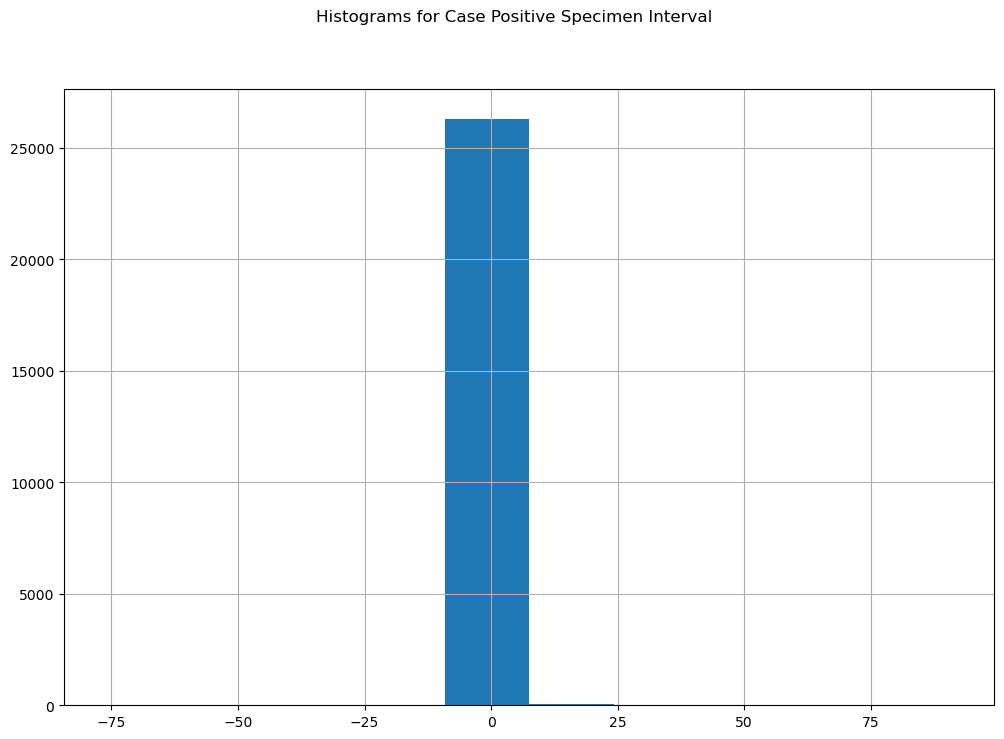

In [195]:
# Plot histograms for continuous features
import matplotlib.pyplot as plt

df['case_positive_specimen_interval'].hist(figsize=(12, 8))
plt.suptitle('Histograms for Case Positive Specimen Interval')
plt.show()

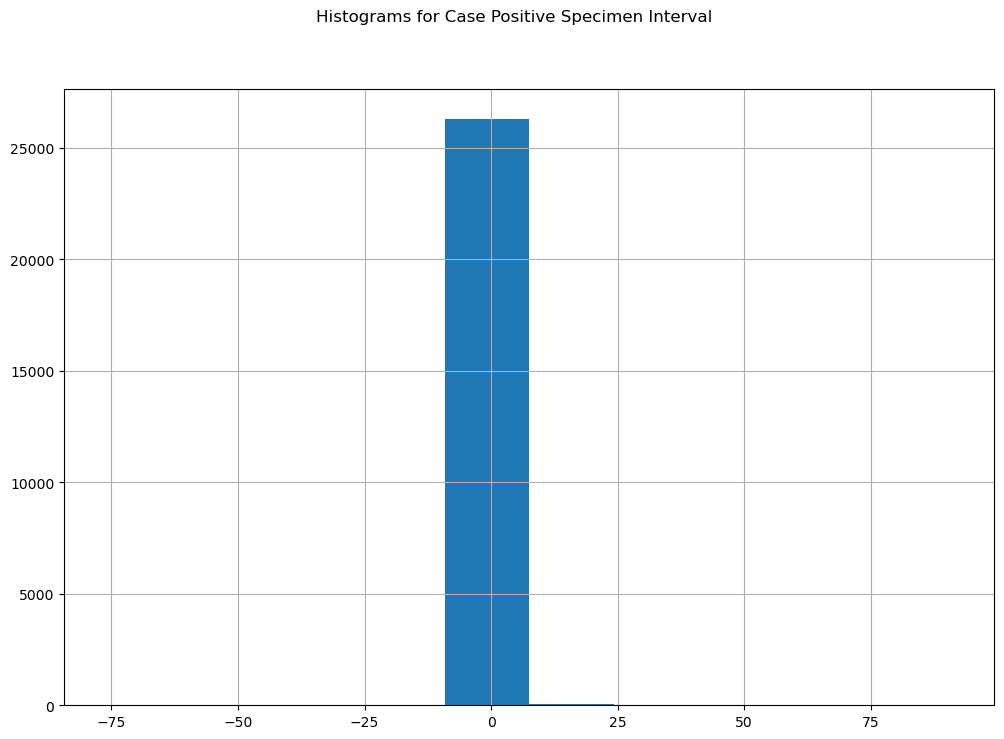

In [199]:
# Plot histograms for continuous features
import matplotlib.pyplot as plt

df['case_positive_specimen_interval'].hist(figsize=(12, 8))
plt.suptitle('Histograms for Case Positive Specimen Interval')
plt.show()

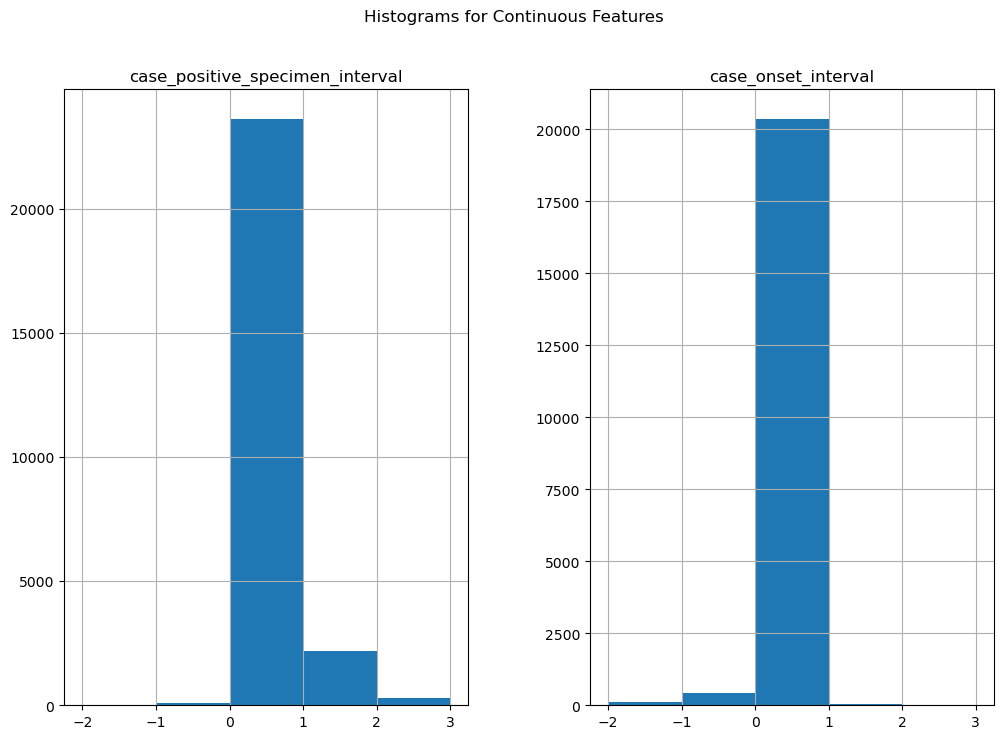

In [202]:
# Plot histograms for continuous features
df[cont_features].hist(bins=5, figsize=(12, 8), range=[-2,3])
plt.suptitle('Histograms for Continuous Features')
plt.show()

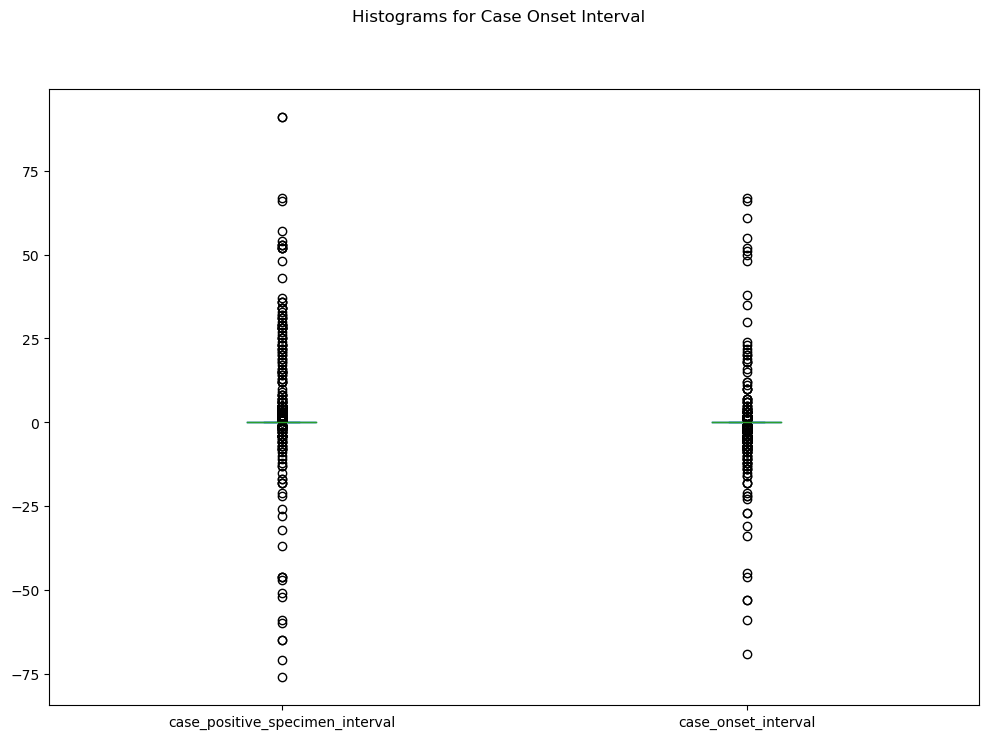

In [204]:
df[cont_features].plot(kind='box', figsize=(12, 8))

plt.suptitle('Histograms for Case Onset Interval')
plt.show()

In [17]:
# Prepare %missing column
numeric_columns_missing  = 100 * (df[['case_positive_specimen_interval','case_onset_interval']].isnull().sum()/df.shape[0])
# store the values in a dataframe
df_numeric_missing = pd.DataFrame(numeric_columns_missing, columns=['%missing'])
df_numeric_missing

,%missing
case_positive_specimen_interval,47.160
case_onset_interval,57.638


In [18]:
df['case_positive_specimen_interval'].value_counts(dropna=False)[:1]

0.0    23641
NaN    23580
1.0     2201
Name: case_positive_specimen_interval, dtype: int64

In [19]:
df['case_onset_interval'].value_counts(dropna=False)[:0]

NaN    28819
0.0    20371
Name: case_onset_interval, dtype: int64

In both 'case_positive_specimen_interval' and 'case_onset_interval' have both extremely high missing% values at 47.160
and	57.638 resepctively. 46.4% of all rows hae either 0.0 or NaN for either 'case_positive_specimen_interval' or 'case_onset_interval'. Drop both features.

In [20]:
df = df.drop('case_positive_specimen_interval',1)
df = df.drop('case_onset_interval',1)

# Categorical Features

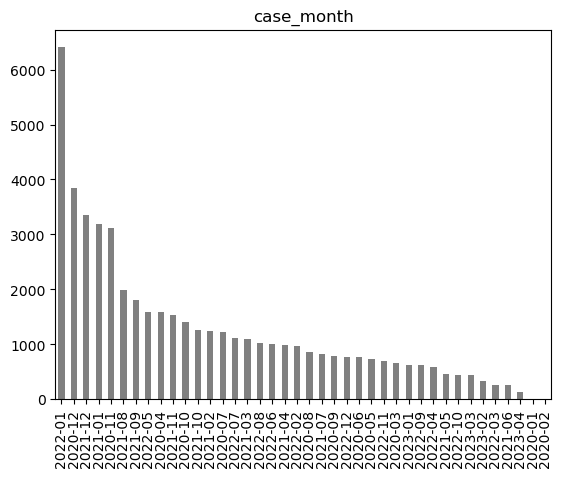

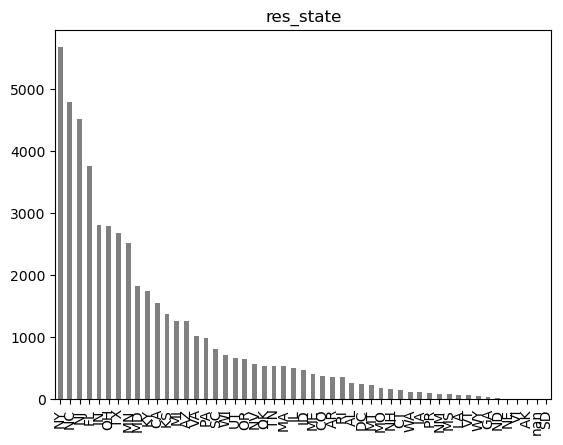

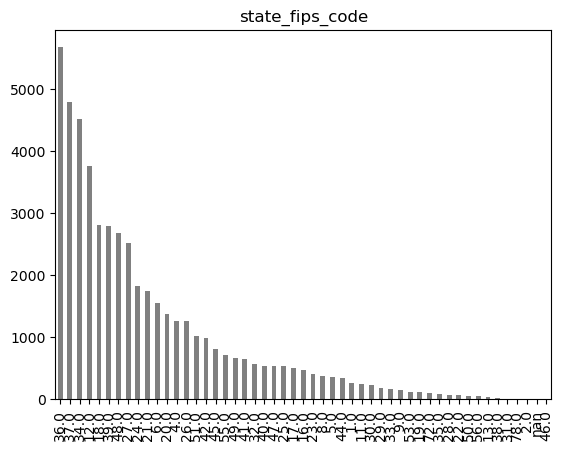

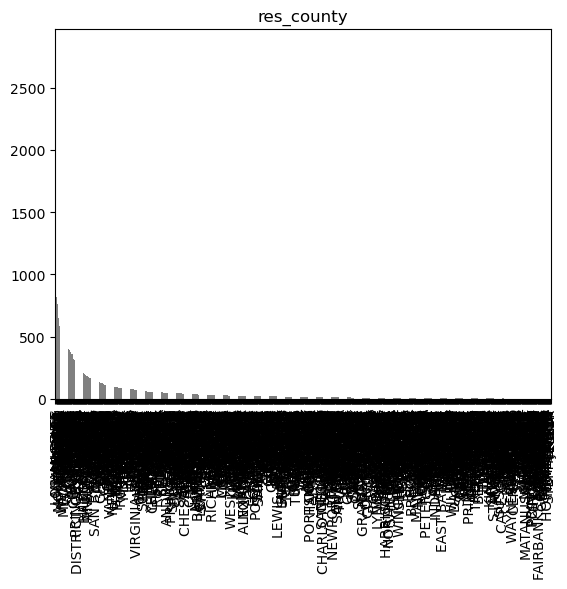

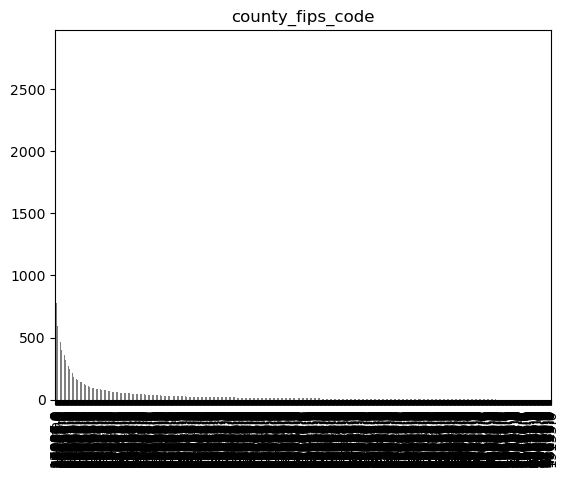

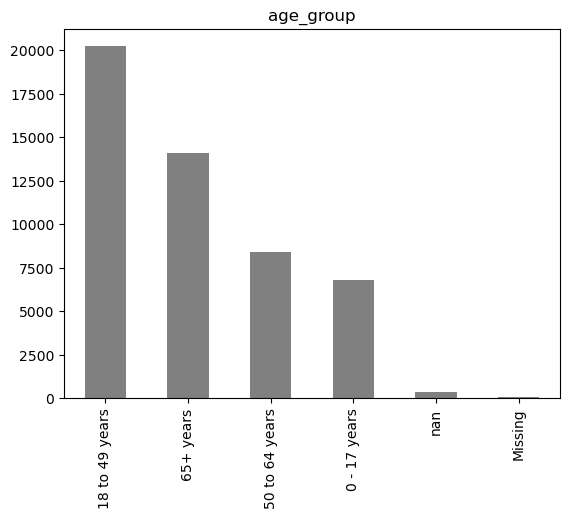

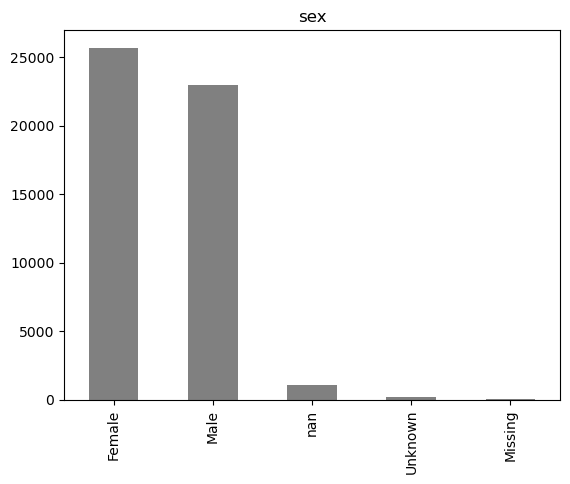

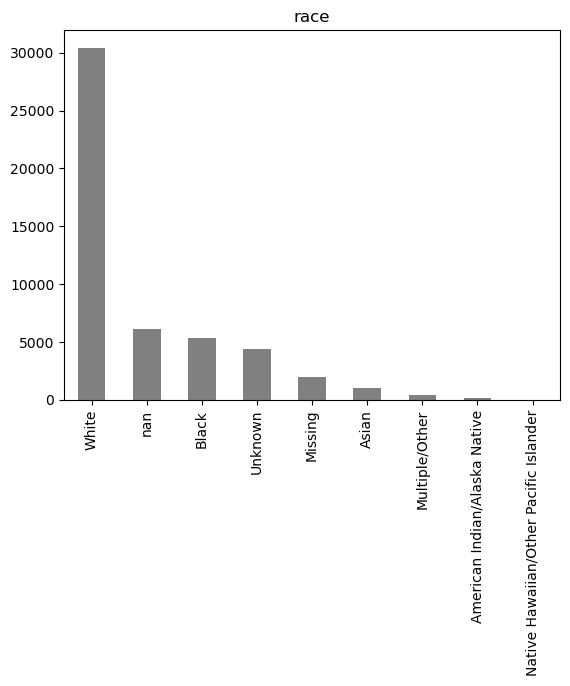

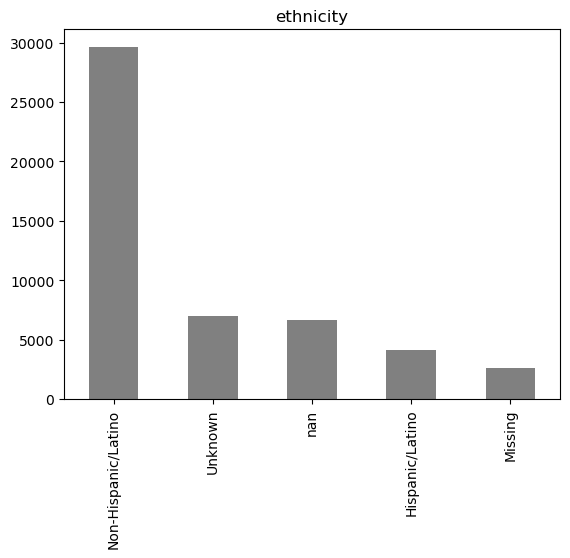

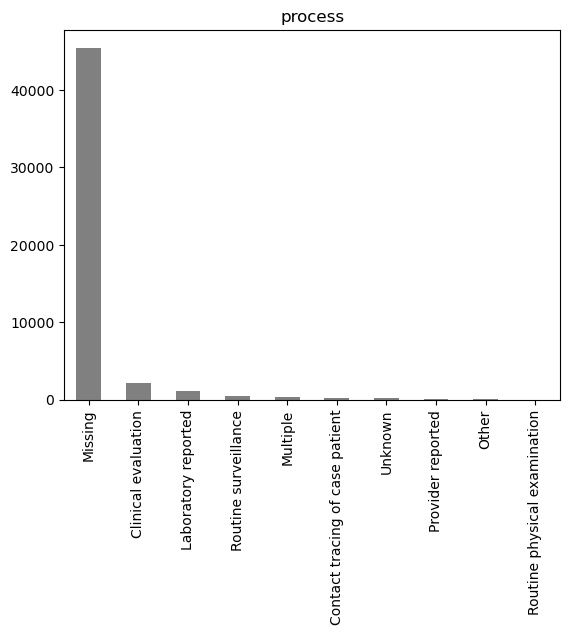

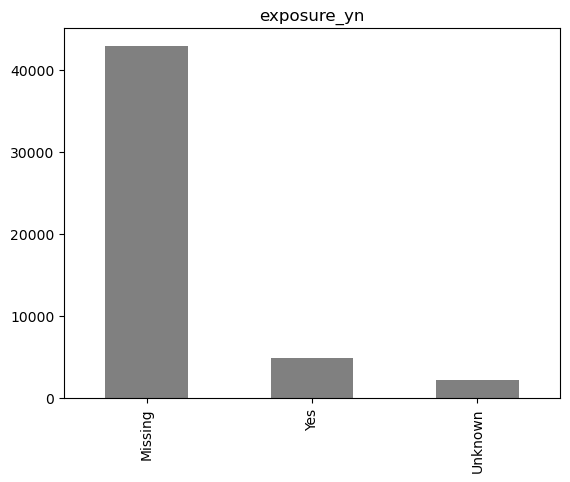

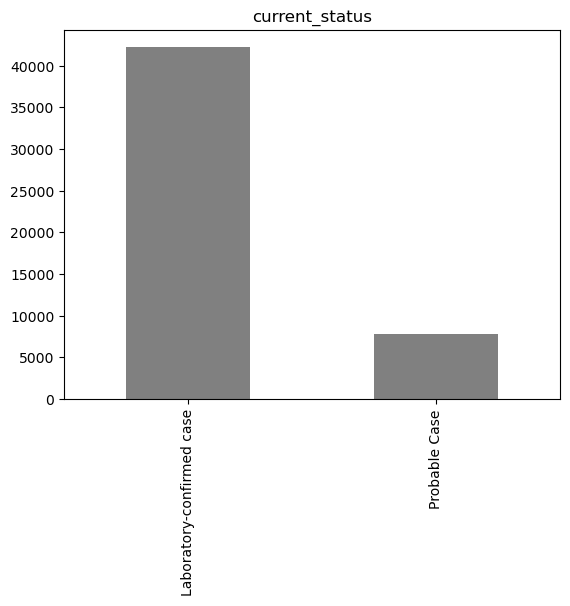

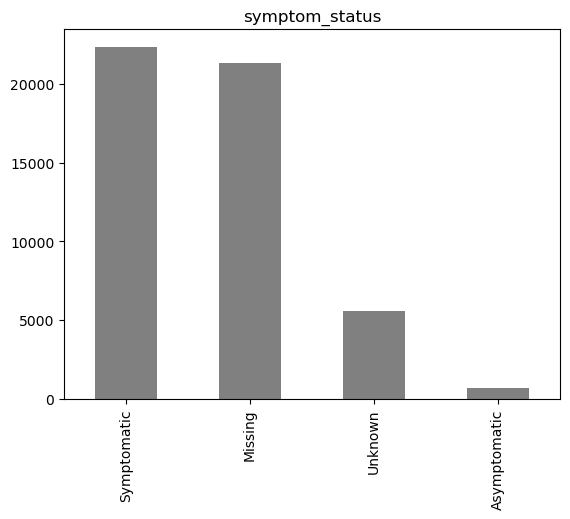

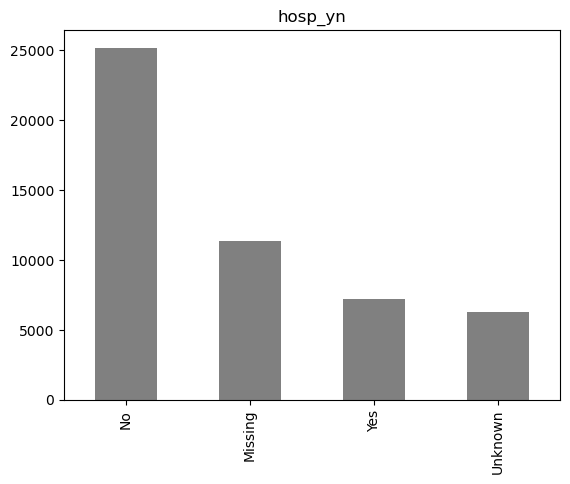

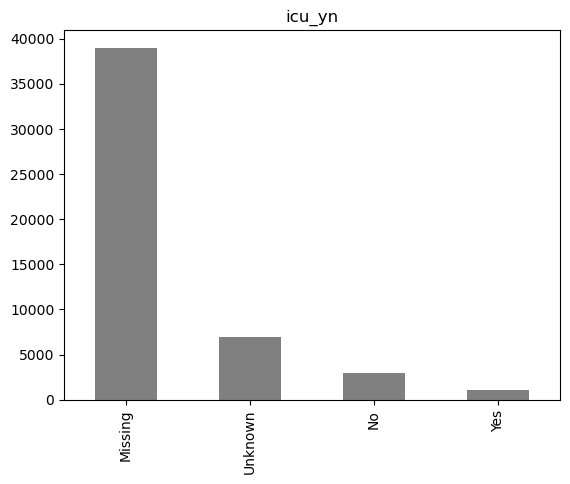

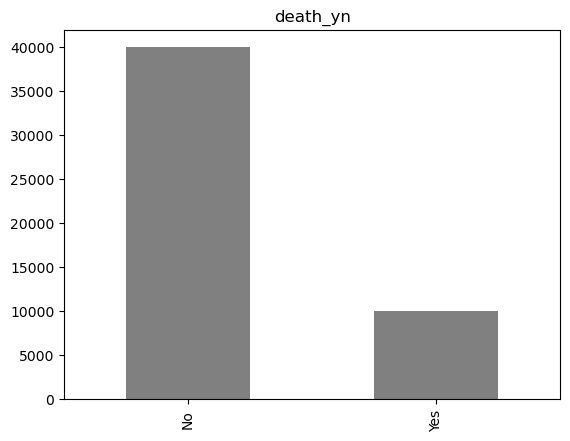

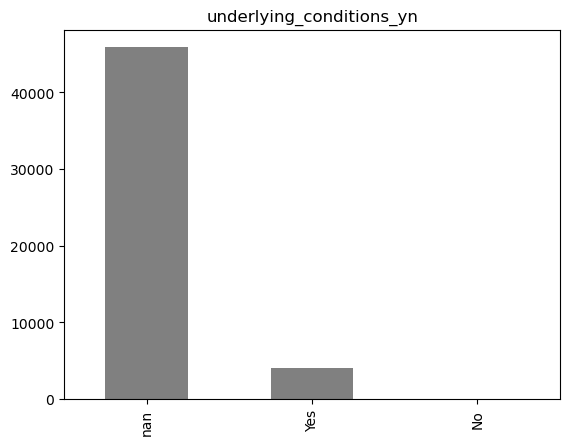

In [206]:
# Plot bar plots for categorical features
categorical_features = df.select_dtypes(include='category').columns
for col in categorical_features:
    plt.figure()
    df[col].value_counts(dropna=False).plot(kind='bar',subplots=True, figsize=(10,3), sharex=False, sharey=False, color = 'grey')
    plt.show()

### Underlying Conditions
The underlying_conditions_yn column is missing over 91.8% of its values. Conclusion can be drawn from this data as 98.7% of the data had the value 'Yes'. Drop feature as its missing lots of values and it is borderline constant. 

In [21]:
df['underlying_conditions_yn'].value_counts(dropna=False) #drop

NaN    45887
Yes     4058
No        55
Name: underlying_conditions_yn, dtype: int64

In [22]:
df = df.drop('underlying_conditions_yn',1)

### Res State, State Code, Res County and County Code

I wanted to replace the NANs with the most frequently occurring county value with respect to each county. To elaborate, the most frequently occurring value in column 'res_county' which has 'res_state' = 'AL' should be used to replace all the rows that have 'res_county' == NAN and 'res_state' == 'AL'.
However, there are privacy protections in place which have led to these null values;

State; "Quasi-identifier for k-anonymity, k=11. Suppressed when # cases < 1,000"

County;
"Quasi-identifier for k-anonymity, k=11. Suppressed when # cases < 1,000. Suppressed when population < 20,000. Suppressed when only single county within state is suppressed and would reveal value, so next smallest county suppressed so at least two counties will be suppressed. Suppressed any time state is suppressed."

I will therefore replace all Nan values with the value "Surpressed". 

In [23]:
# Look at rows where case_positive_specimen_interval is not missing and the values for case_onset_interval.
res_county_missing = df[df['res_county'].isnull()]
res_county_missing

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn
2,2021-11,KY,21.0,NaN,NaN,65+ years,Female,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Missing,Yes,No,Yes
17,2021-02,KY,21.0,NaN,NaN,65+ years,Female,White,Non-Hispanic/Latino,Missing,Missing,Probable Case,Missing,Unknown,Missing,Yes
27,2020-10,TX,48.0,NaN,NaN,65+ years,Missing,Unknown,Unknown,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes
43,2020-04,IN,18.0,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes
44,2020-10,MN,27.0,NaN,NaN,65+ years,Male,White,Non-Hispanic/Latino,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49782,2020-10,KY,21.0,NaN,NaN,18 to 49 years,Female,Black,Non-Hispanic/Latino,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No
49813,2021-10,NV,32.0,NaN,NaN,18 to 49 years,Female,White,Non-Hispanic/Latino,Routine surveillance,Yes,Laboratory-confirmed case,Symptomatic,No,Missing,No
49817,2022-12,VA,51.0,NaN,NaN,65+ years,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No
49889,2021-12,NC,37.0,NaN,NaN,18 to 49 years,Female,Unknown,Unknown,Missing,Missing,Laboratory-confirmed case,Unknown,Unknown,Unknown,No


In [24]:
df['res_county'] = df['res_county'].astype('str')
df['county_fips_code'] = df['county_fips_code'].astype('str')

df['res_county'].fillna('Surpressed', inplace=True)
df['county_fips_code'].fillna('Surpressed', inplace=True)

df['res_county'] = df['res_county'].replace('nan', 'Surpressed')
df['county_fips_code'] = df['county_fips_code'].replace('nan', 'Surpressed')

df['res_county'] = df['res_county'].astype('category')
df['county_fips_code'] = df['county_fips_code'].astype('category')

### Resident State
Some States are protected with surpressed values due to case numbers. 
However, null value only affects two rows which are both missing majority of data also. Can safely remove these rows.

In [25]:
df[df['res_state'].isnull()]

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn
22446,2021-07,NaN,NaN,Surpressed,Surpressed,NaN,NaN,NaN,NaN,Clinical evaluation,Missing,Laboratory-confirmed case,Unknown,Unknown,Missing,No
36032,2021-02,NaN,NaN,Surpressed,Surpressed,NaN,NaN,NaN,NaN,Clinical evaluation,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No


In [26]:
df = df[df['res_state'].notna()]
df = df[df['state_fips_code'].notna()]

### Age Group, Sex, Race and Ethinicity

These columns contain null values and would not be appropriate to use a mode value as it would not be an accurate guess in this case.These columns contain null values due to privacy protection regulations;

Age; 
"Quasi-identifier for k-anonymity, k=11."

Sex, Race, Ethnicity;
"Quasi-identifier for k-anonymity, k=11. Suppressed when population of sex, race, ethnicity in county < 220 (k*20, so will change if k is changed). Suppressed when case count for county demographic subpopulation >= half county demographic subpopulation."

I have opted to replace null values with 'Missing' instead to save the rows data values for other columns that may be useful.

I also considered taking the 'Hispanic' value from ethinicity and add it to the race category. But upon further inspection, I have learned that Hispanic origin may apply to any race and is not a race in itself. 

In [27]:
df[df['age_group'].isnull()]

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn
43,2020-04,IN,18.0,Surpressed,Surpressed,NaN,NaN,NaN,NaN,Unknown,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes
353,2020-03,NC,37.0,Surpressed,Surpressed,NaN,NaN,NaN,NaN,Missing,Unknown,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes
654,2020-08,IN,18.0,Surpressed,Surpressed,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,Yes
758,2022-01,CT,9.0,Surpressed,Surpressed,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,Yes
1119,2020-03,VA,51.0,Surpressed,Surpressed,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Missing,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49678,2020-06,OK,40.0,CANADIAN,40017.0,NaN,NaN,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Unknown,Yes,Missing,No
49731,2021-09,OH,39.0,TRUMBULL,39155.0,NaN,NaN,NaN,NaN,Routine surveillance,Unknown,Laboratory-confirmed case,Symptomatic,Yes,Missing,No
49803,2020-04,MI,26.0,HURON,26063.0,NaN,NaN,NaN,NaN,Missing,Yes,Probable Case,Symptomatic,No,Missing,No
49863,2023-03,NC,37.0,CABARRUS,37025.0,NaN,NaN,NaN,NaN,Missing,Missing,Probable Case,Unknown,Unknown,Unknown,No


In [28]:
#Adding the Missing values
df['age_group'].fillna('Missing', inplace=True)
df['sex'].fillna('Missing', inplace=True)
df['race'].fillna('Missing', inplace=True)
df['ethnicity'].fillna('Missing', inplace=True)

### Check for Null Values

In [29]:
df.isnull().sum()

case_month          0
res_state           0
state_fips_code     0
res_county          0
county_fips_code    0
age_group           0
sex                 0
race                0
ethnicity           0
process             0
exposure_yn         0
current_status      0
symptom_status      0
hosp_yn             0
icu_yn              0
death_yn            0
dtype: int64

- Result - No direct null values left in the spreadsheet. Missing or Surpressed Data are expressed as such.

### Checking for Large Amounts of Missing or Unknown Data

In [30]:
# store the 2ndmode and 2ndmode % values in a new dataframe
df_table_categ = df.describe().T
df_category_mode = pd.DataFrame(index = df_table_categ.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
# Look at the values taken by each categorical feature
for column in df:
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'

df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
case_month,2022-01,6410,0.128205,2020-12,3848,0.076963
res_state,NY,5670,0.113405,NC,4788,0.095764
state_fips_code,36.0,5670,0.113405,37.0,4788,0.095764
res_county,Surpressed,2831,0.056622,MIAMI-DADE,964,0.019281
county_fips_code,Surpressed,2831,0.056622,12086.0,964,0.019281
age_group,18 to 49 years,20216,0.404336,65+ years,14104,0.282091
sex,Female,25680,0.513621,Male,22980,0.459618
race,White,30412,0.608264,Missing,8119,0.162386
ethnicity,Non-Hispanic/Latino,29620,0.592424,Missing,9252,0.185047
process,Missing,45453,0.909096,Clinical evaluation,2139,0.042782


As we can see, many categories have large Missing/Unknown values in either their first or seocnd modes. 
Such as; 
    icu_yn, hosp_yn, symptom_status, exposure_yn, process.
    
Categories such as icu_yn, exposure_yn, process have large majorities of their data points as Missing or Unknown making them extremely poor data qaulity columns. They can be removed without penalty. 

When combining the Unknown and Missing values in symptom_status column, these basically null values take up 54% of the total values. This column will also be removed. 

When combining the Unknown and Missing values in hosp_yn column, these values take up 35% of the total values. This column can be kept but data quality is still relatively poor.

In [31]:
df['symptom_status'].value_counts()

Symptomatic     22361
Missing         21321
Unknown          5606
Asymptomatic      710
Name: symptom_status, dtype: int64

In [32]:
df['hosp_yn'].value_counts()

No         25188
Missing    11328
Yes         7231
Unknown     6251
Name: hosp_yn, dtype: int64

In [33]:
df = df.drop('symptom_status',1)
df = df.drop('icu_yn',1)
df = df.drop('process',1)
df = df.drop('exposure_yn',1)

In [34]:
df

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,death_yn
0,2020-12,CA,6.0,LOS ANGELES,6037.0,65+ years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,Yes
1,2021-01,MA,25.0,WORCESTER,25027.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Yes
2,2021-11,KY,21.0,Surpressed,Surpressed,65+ years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Yes
3,2022-02,FL,12.0,DUVAL,12031.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,Yes
4,2021-08,CA,6.0,SHASTA,6089.0,65+ years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2020-07,MI,26.0,WEXFORD,26165.0,Missing,Missing,Missing,Missing,Laboratory-confirmed case,No,No
49996,2021-12,NC,37.0,WILSON,37195.0,0 - 17 years,Male,Black,Non-Hispanic/Latino,Laboratory-confirmed case,No,No
49997,2021-07,SC,45.0,BEAUFORT,45013.0,0 - 17 years,Male,Black,Non-Hispanic/Latino,Probable Case,No,No
49998,2022-05,MN,27.0,ST. LOUIS,27137.0,50 to 64 years,Male,Missing,Missing,Probable Case,Missing,No


### Check for Irregular cardinalities & permitted values

In [35]:
# Descriptive statistics for categorical features
cat_columns = df.select_dtypes(['category']).columns
df_table_categ = df[cat_columns].describe().T
df_table_categ
#categorical_stats = categorical_features.describe(include='all')
#round(categorical_stats,2)

,count,unique,top,freq
case_month,49998,40,2022-01,6410
res_state,49998,50,NY,5670
state_fips_code,49998.0,50.0,36.0,5670.0
res_county,49998,960,Surpressed,2831
county_fips_code,49998,1365,Surpressed,2831
age_group,49998,5,18 to 49 years,20216
sex,49998,4,Female,25680
race,49998,8,White,30412
ethnicity,49998,4,Non-Hispanic/Latino,29620
current_status,49998,2,Laboratory-confirmed case,42228


As we can see from the unique columns, all cardinalities are regular excpet for the difference between 'county_fips_code' and 'res_county'. The reason for this is that there are multiple counties that have the same name but are located in different states. Therefore, the unique values for these counties are dulpicated in the 'res_county' column. To fix this solution, I will combine both of these columns and leave us with a regular cardinality. I will also combine 'res_state' and 'state_fips_code' columns for consistency.  

In [36]:
df.loc[(df['res_county']== 'NASSAU') & (df['county_fips_code'] != '36059.0')] #same name county in two states 

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,death_yn
1996,2020-08,FL,12.0,NASSAU,12089.0,65+ years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,Yes
25033,2021-07,FL,12.0,NASSAU,12089.0,50 to 64 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,No
26987,2020-11,FL,12.0,NASSAU,12089.0,18 to 49 years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,No


In [37]:
df.loc[(df['res_county']== 'NASSAU') & (df['county_fips_code'] == '36059.0')] #same name county in two states 

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,current_status,hosp_yn,death_yn
403,2020-03,NY,36.0,NASSAU,36059.0,65+ years,Female,Missing,Unknown,Laboratory-confirmed case,Yes,Yes
531,2020-04,NY,36.0,NASSAU,36059.0,65+ years,Male,White,Unknown,Laboratory-confirmed case,Missing,Yes
571,2020-04,NY,36.0,NASSAU,36059.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Unknown,Yes
953,2020-04,NY,36.0,NASSAU,36059.0,65+ years,Female,Missing,Missing,Laboratory-confirmed case,Missing,Yes
1047,2020-04,NY,36.0,NASSAU,36059.0,50 to 64 years,Male,White,Unknown,Laboratory-confirmed case,Missing,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...
49651,2022-05,NY,36.0,NASSAU,36059.0,18 to 49 years,Female,White,Unknown,Laboratory-confirmed case,Missing,No
49744,2023-01,NY,36.0,NASSAU,36059.0,50 to 64 years,Female,White,Unknown,Laboratory-confirmed case,Missing,No
49802,2021-12,NY,36.0,NASSAU,36059.0,50 to 64 years,Female,Missing,Missing,Laboratory-confirmed case,Missing,No
49810,2021-01,NY,36.0,NASSAU,36059.0,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,No


In [38]:
df['res_county'] = df['res_county'].astype('str')
df['county_fips_code'] = df['county_fips_code'].astype('str')


df["County/Code"] = (df["res_county"] + ' / ' + df['county_fips_code'])

df['County/Code'] = df['County/Code'].astype('category')

df = df.drop('res_county',1)
df = df.drop('county_fips_code',1)

In [39]:
df['res_state'] = df['res_state'].astype('str')
df['state_fips_code'] = df['state_fips_code'].astype('str')

df["State/Code"] = (df["res_state"] + ' / ' + df['state_fips_code'])


df['State/Code'] = df['State/Code'].astype('category')

df = df.drop('res_state',1)
df = df.drop('state_fips_code',1)

In [40]:
# Descriptive statistics for categorical features
cat_columns = df.select_dtypes(['category']).columns
df_table_categ = df[cat_columns].describe().T
df_table_categ
#categorical_stats = categorical_features.describe(include='all')
#round(categorical_stats,2)

,count,unique,top,freq
case_month,49998,40,2022-01,6410
age_group,49998,5,18 to 49 years,20216
sex,49998,4,Female,25680
race,49998,8,White,30412
ethnicity,49998,4,Non-Hispanic/Latino,29620
current_status,49998,2,Laboratory-confirmed case,42228
hosp_yn,49998,4,No,25188
death_yn,49998,2,No,39998
County/Code,49998,1366,Surpressed / Surpressed,2831
State/Code,49998,50,NY / 36.0,5670


There are no irregular cardinalities. The values that appear seem to be in the permitted range.

### - Save updated/cleaned data frame to a new csv file.

In [41]:
# Write the dataframe to a csv file
df.to_csv('CDC_COVID_1-1_cleaned.csv', index=False)

## Descriptive Statistics: Continuous Features
In our data we no longer possess any continuous features

## Descriptive Statistics: Categorical Features


In [42]:
df[cat_columns].describe().T

,count,unique,top,freq
case_month,49998,40,2022-01,6410
age_group,49998,5,18 to 49 years,20216
sex,49998,4,Female,25680
race,49998,8,White,30412
ethnicity,49998,4,Non-Hispanic/Latino,29620
current_status,49998,2,Laboratory-confirmed case,42228
hosp_yn,49998,4,No,25188
death_yn,49998,2,No,39998
County/Code,49998,1366,Surpressed / Surpressed,2831
State/Code,49998,50,NY / 36.0,5670


In [43]:
# Print table with descriptive statistics for all the categorical features
#df.select_dtypes(['category']).describe().T
# store the 2ndmode and 2ndmode % values in a new dataframe
df_table_categ = df.describe().T
df_category_mode = pd.DataFrame(index = df_table_categ.index, columns=['mode', 'freq_mode','%mode', '2ndmode', 'freq_2ndmode','%2ndmode'])
# Look at the values taken by each categorical feature
for column in df:
    
    df_category_mode.loc[column]['mode'] = df[column].value_counts().keys()[0]
    df_category_mode.loc[column]['freq_mode'] = df[column].value_counts()[df_category_mode.loc[column]['mode']]
    df_category_mode.loc[column]['%mode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['mode']]
 

    if df[column].value_counts().size > 1:
        df_category_mode.loc[column]['2ndmode'] = df[column].value_counts().keys()[1]
        df_category_mode.loc[column]['freq_2ndmode'] = df[column].value_counts()[df_category_mode.loc[column]['2ndmode']]
        df_category_mode.loc[column]['%2ndmode'] = df[column].value_counts(normalize=True)[df_category_mode.loc[column]['2ndmode']]
    else: df_category_mode.loc[column] = '-'

df_category_mode

,mode,freq_mode,%mode,2ndmode,freq_2ndmode,%2ndmode
case_month,2022-01,6410,0.128205,2020-12,3848,0.076963
age_group,18 to 49 years,20216,0.404336,65+ years,14104,0.282091
sex,Female,25680,0.513621,Male,22980,0.459618
race,White,30412,0.608264,Missing,8119,0.162386
ethnicity,Non-Hispanic/Latino,29620,0.592424,Missing,9252,0.185047
current_status,Laboratory-confirmed case,42228,0.844594,Probable Case,7770,0.155406
hosp_yn,No,25188,0.50378,Missing,11328,0.226569
death_yn,No,39998,0.799992,Yes,10000,0.200008
County/Code,Surpressed / Surpressed,2831,0.056622,MIAMI-DADE / 12086.0,964,0.019281
State/Code,NY / 36.0,5670,0.113405,NC / 37.0,4788,0.095764


### - Save descriptive statistics for all the categorical features to csv for data quality report

In [44]:
categoricalFeatueDesc = df_category_mode
categoricalFeatueDesc.to_csv("categoricalFeatureDescription.csv")

### - Plot bar plots individual sheet for all the categorical features.

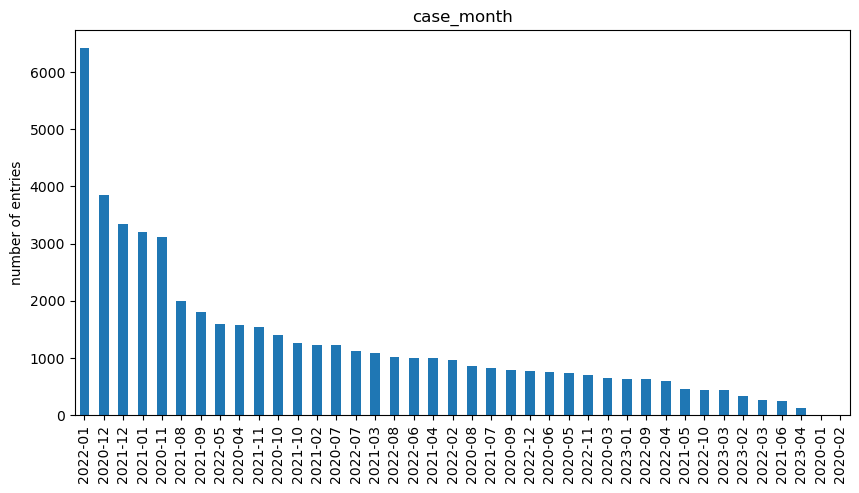

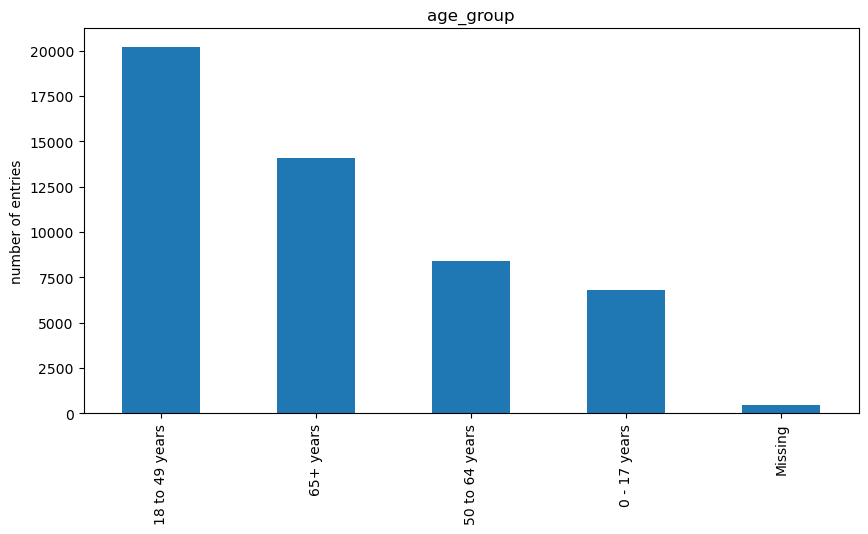

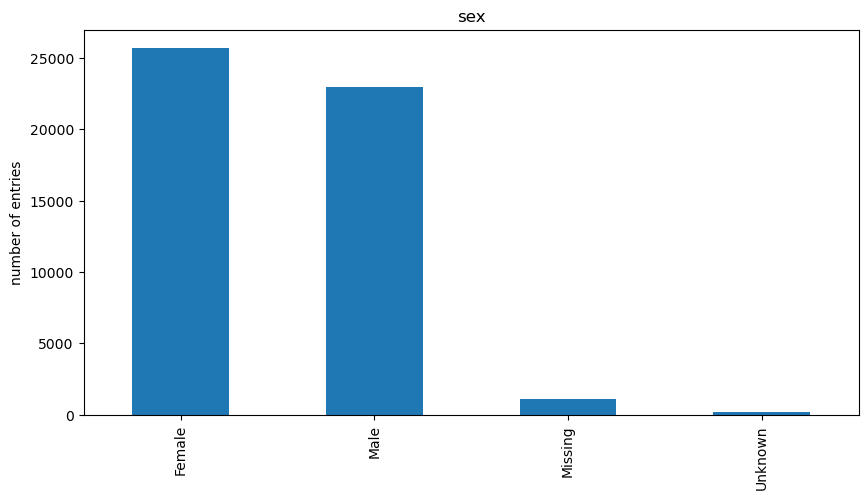

In [45]:
for col in cat_columns[0:3]:
        f = df[col].value_counts().plot(kind='bar', figsize=(10,5))
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()

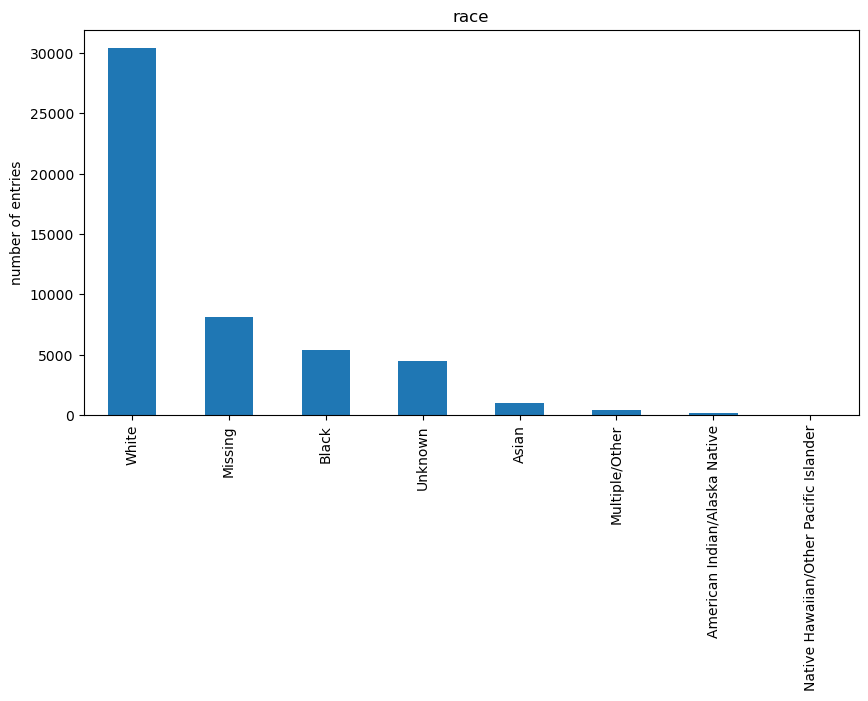

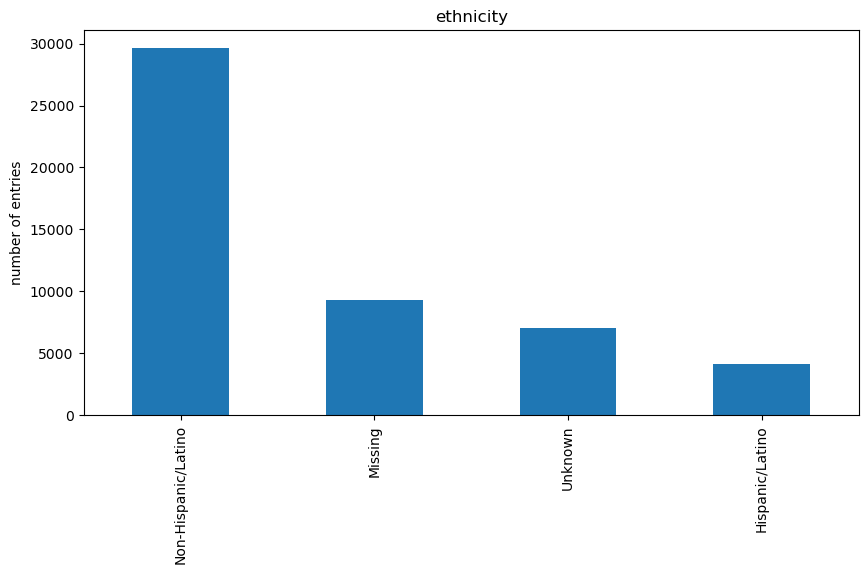

In [46]:
for col in cat_columns[3:5]:
        f = df[col].value_counts().plot(kind='bar', figsize=(10,5))
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()

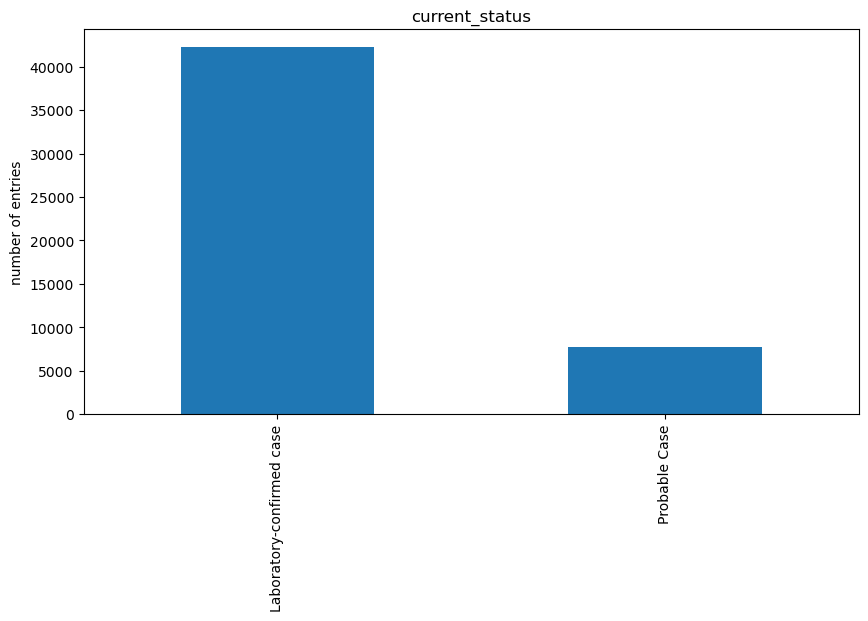

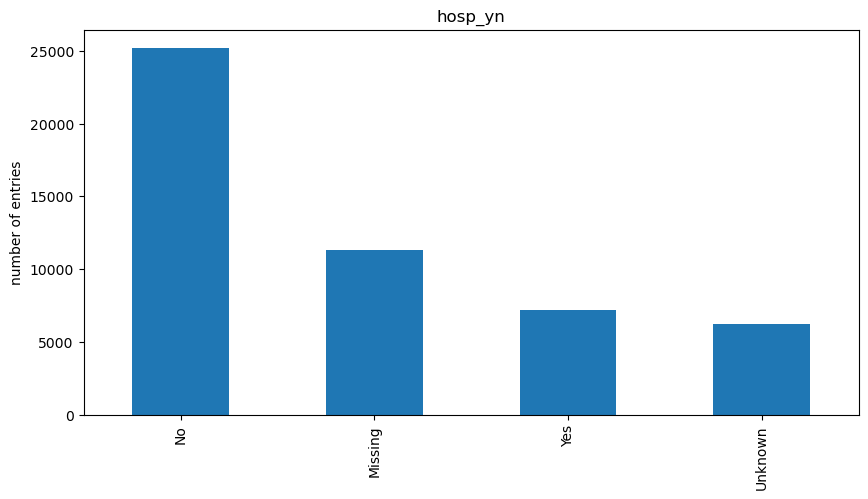

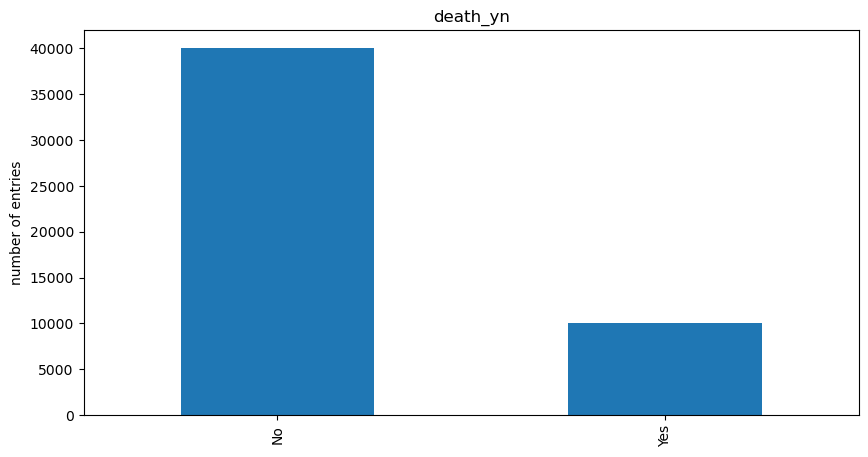

In [47]:
for col in cat_columns[5:8]:
        f = df[col].value_counts().plot(kind='bar', figsize=(10,5))
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()

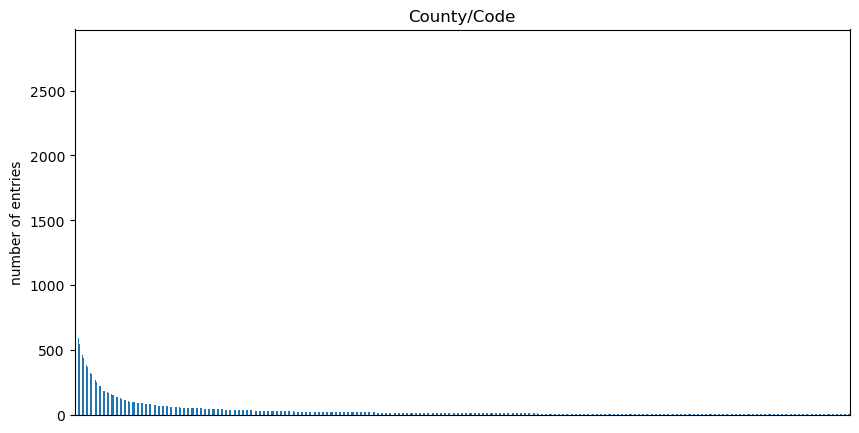

In [48]:
for col in cat_columns[8:9]:
        f = df[col].value_counts().plot(kind='bar', xticks = [], figsize=(10,5))
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()

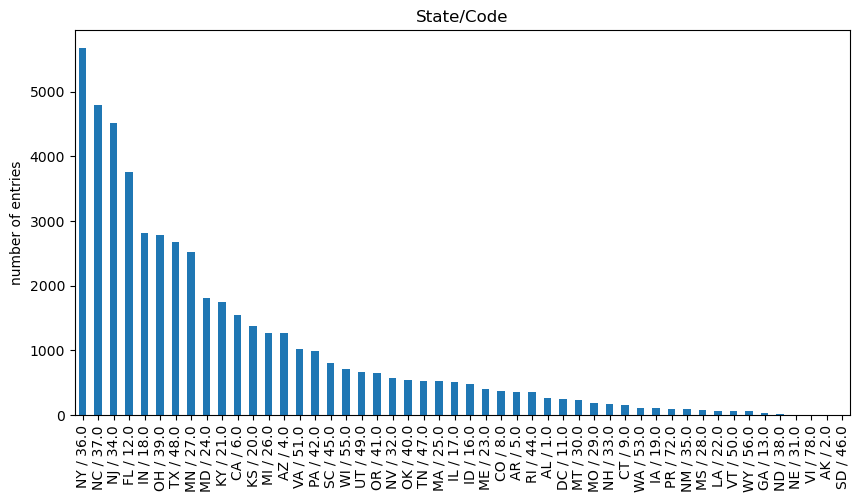

In [49]:
for col in cat_columns[9:10]:
        f = df[col].value_counts().plot(kind='bar', figsize=(10,5))
        plt.title(col)
        plt.ylabel('number of entries')
        plt.show()

**Running Assessment:**

-  The **cardinalities** of the Categorical features make sense.  
<br>

-  There are no **null values** remaining in the Categorical features.
<br>

# Initial Findings

### Initial findings and detailed discussion for each feature can be found in the accompanying *Data_Quality_Report_Initial_Findings.pdf* file

# (2). Data Understanding: Data Quality Plan for the cleaned CSV file.

### The initial list of issues as identified in the **Data_Quality_Report_Initial_Findings.pdf**:

**Null Values**
- The main issue with the majority of the features is the large proportion of null or missing values. Many of the features had large percentages of null values as well as Missing and Unknown values. 

**Irregular Cardinality**
- Cardinality did not match up for **res_state** and **county_fips** code where they should have. 


### - Propose solutions to deal with the problems identified. 

**Null Values**

   -  Appears in 12 features. 
        **res_state** & **state_fips_code** only contained 2 rows with null values. After examining these two rows it was clear that these rows were made up of mostly empty values. 
   - Many features such as **res_county** contained null values due to privacy protection and not just through missing values. In the case of *res_county* and *county_fips_code*, I replace these nulls with 'Surpressed' values. However, in other features that already had a 'Missing' field, I simply combined the null values with the 'Missing' values. 
   - Also some feature's rows were filled with majority null or missing values. In many cases, over 50% of the rows were null or missing values. These features were dropped due to poor data quality. 
        
**Irregular Cardinality**

   - Cardinality did not match up for **res_state** and **county_fips** code where they should have. This was due to the fact that some counties shared their names but resided in different states. This resulted in a lower cardinality in the **res_state column** than the **county_fips_code** column. Combining the two features solved this problem.

### - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 

### - Save the new CSV file with a self explanatory name. Save the data quality plan to a single PDF file (as a table or a structured text).

Data quality plan saved as a picture and available in Data_Quality_Plan.pdf.

## Data Understanding: Data Quality Plan

    
| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |
|case_month (category)                          |   None |Keep as is |
res_state (category)             | 2 Null Rows              | Drop affected rows, rows contain mostly null values     
state_fips_code (category)       | 2 Null Rows | Same as res_state. Combine res_state and state_fips_code|
res_county (category)             | Null Values (5.6%), Cardinality doesnt match county_fips_code       | Null values changed to 'Surpressed', Combine with county_fips_code  | 
county_fips_code (category)                 | Null Values (5.6%), Cardinality doesnt match county_fips_code       | Null values changed to 'Surpressed', Combine with county_fips_code  |   
age_group (category)                | Null values (0.8%) | Changed Null values to 'Missing'|
sex (category)    | Null values (2.2%) | Changed Null values to 'Missing'|
race (category)                  | Null values (12.24%) | Changed Null values to 'Missing'|
ethnicity (category)                 | Null values (13.34%) | Changed Null values to 'Missing'|    
case_positive_specimen_interval (float64)                    | Null Values (47%), 0 values (47%), High and Low Outliers | Too many Null Values, Drop Feature |   
case_onset_interval (float64)             | Null values (57%), 0 value (41%), High and Low Outliers| Too many Null Values, Drop Feature |
process (category)               | Missing Values (90%)| Keep as is|
exposure_yn (category)         | Missing Values (86%) | Too many Missing Values, Drop Feature|
current_status (category)         | None | Nothing|
symptom_status                 (category) |Unknown + Missing Values (52%)  | Too many Missing or Unknown Values, Drop Feature |
hosp_yn (category)         | unknown + Missing values (35%) |Keep as is |
icu_yn                 (category) | Missing Values (78%)  | Too many Missing Values, Drop Feature|
death_yn (category)         | None | Keep as is|
underlying_conditions_yn | Null values (91.7%), 98.6% of Non Null are value 'Yes' | Too many Null values, Drop Feature|

In [50]:
# Write the cleaned dataframe to a csv file
df.to_csv('CDC_COVID_1-2_cleaned.csv', index=False)

# (3). Exploring relationships between feature pairs:

### - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., continuous-continuous feature plot or continuous-categorical plots or correlation plots). Explain your choices.

The features that I will look at for pairwise feature interaction are the following categorical features:
- Age 
- Hospital 
- Death
- Case Month

The choices here I based on the idea that these particular features would be strong markers to indicate the outcome of death_yn (target feature) of a patient, as also discussed based on plots in the Data_Quality_report.pdf.

### Categorical vs Categorical feature plots

AgeGroup
Index 	 Count
65+ years 	 14104
50 to 64 years 	 8399
Missing 	 461
18 to 49 years 	 20216
0 - 17 years 	 6818


(0.0, 100.0)

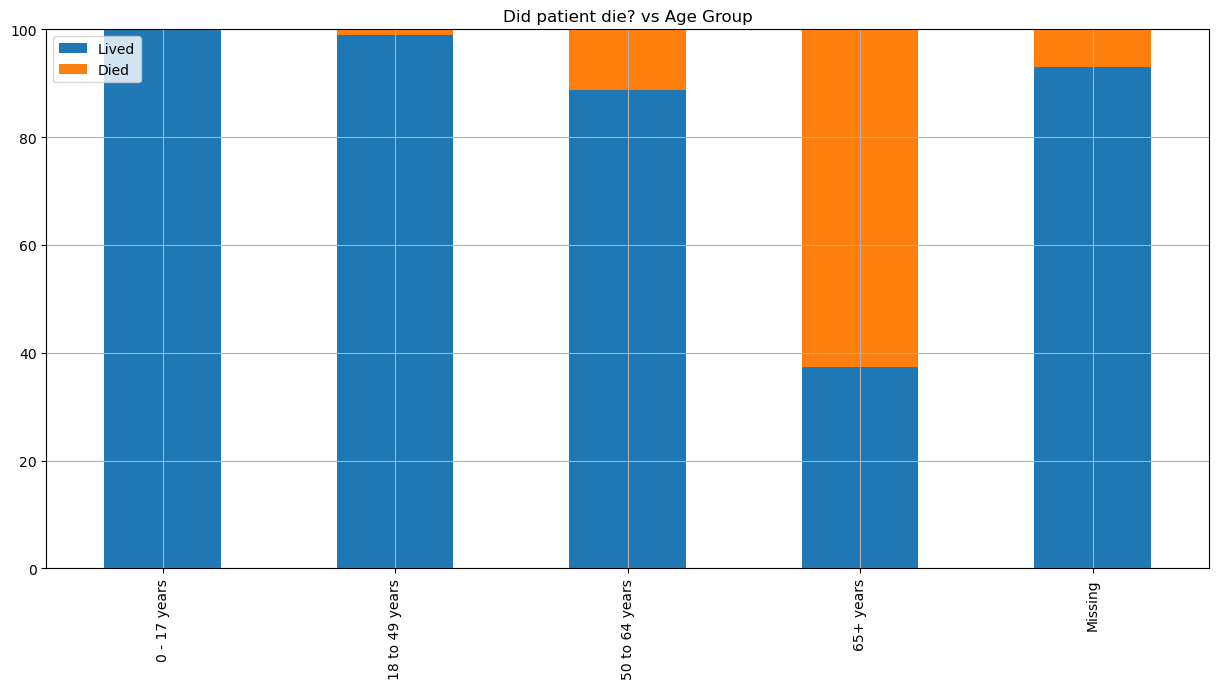

In [51]:
#Using code from the module lab
AgeGroup = pd.unique(df["age_group"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("AgeGroup")
print("Index \t Count")

# for each category
for i in AgeGroup:
    
    count = df[df["age_group"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['age_group'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','age_group','death_yn']].groupby(['age_group','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Did patient die? vs Age Group", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Lived", "Died"])

my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.set_ylim([0,100])


We can see the stacked bar plot for death outcome against the patient age group. 
- On first indication the figures are  as expected.
- There is clear trend of increasing likelihood of death outcome as patient gets older.
- We can see this increase in the graph below.


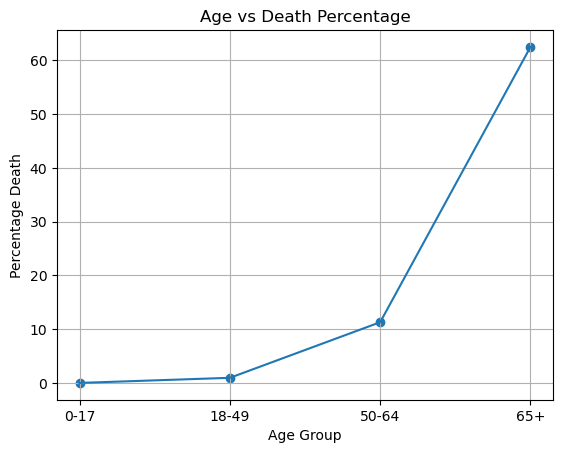

In [52]:
import matplotlib.pyplot as plt 
import numpy as np

age_group =np.array(['0-17','18-49','50-64','65+'])
perc_death=np.array([0.01,.96,11.3,62.5])


plt.scatter(age_group,perc_death)
plt.plot(age_group,perc_death)
plt.grid(True)
plt.xlabel("Age Group")
plt.ylabel("Percentage Death")
plt.title("Age vs Death Percentage");

AgeGroup
Index 	 Count
65+ years 	 14104
50 to 64 years 	 8399
Missing 	 461
18 to 49 years 	 20216
0 - 17 years 	 6818


(0.0, 100.0)

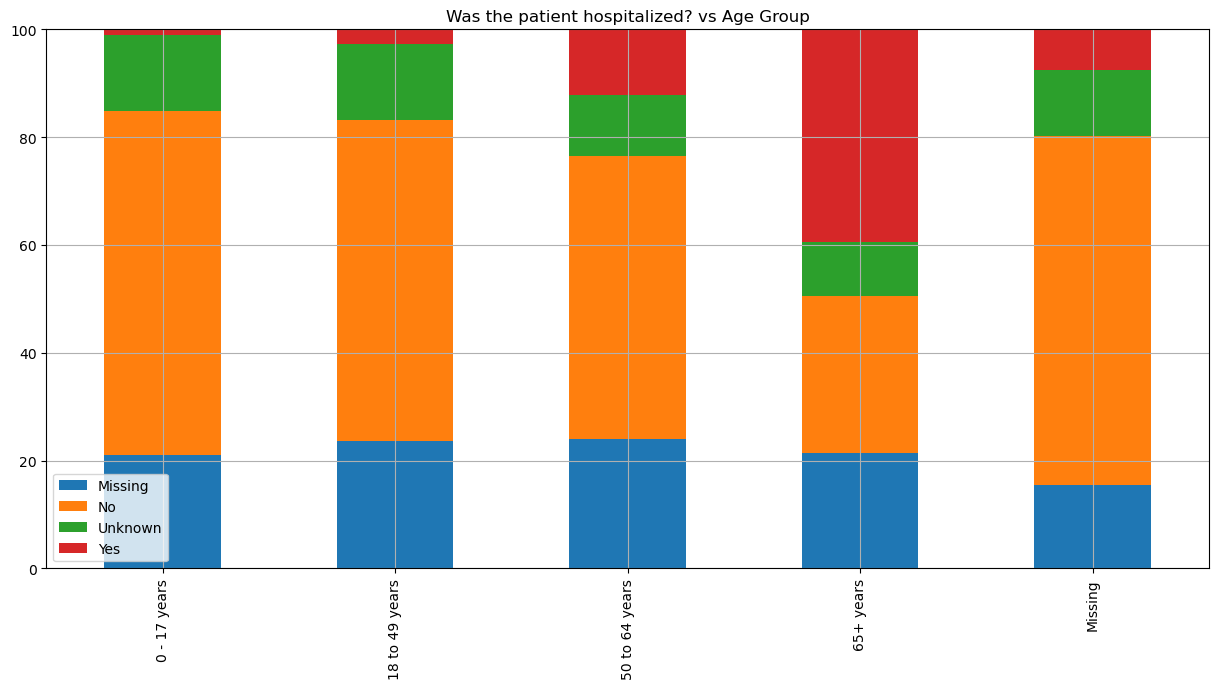

In [53]:
#Using code from the module lab
AgeGroup = pd.unique(df["age_group"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("AgeGroup")
print("Index \t Count")

# for each category
for i in AgeGroup:
    
    count = df[df["age_group"] == i].count()['hosp_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['age_group'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','age_group','hosp_yn']].groupby(['age_group','hosp_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Was the patient hospitalized? vs Age Group", figsize=(15,7), grid=True)

my_plot.legend(['Missing', 'No', 'Unknown', 'Yes'])

my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for age against the death risk outcome. 
- On first indication the figures are as expected.
- There is a similar clear trend of increasing likelihood of hospitlisation as patient gets older.
- We can see this increase in the graph below.

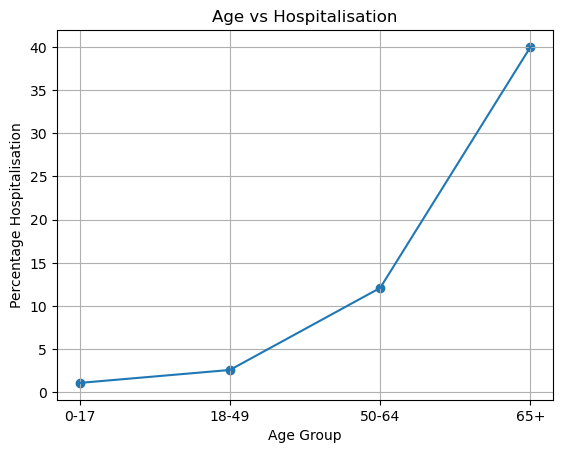

In [54]:
import matplotlib.pyplot as plt 
import numpy as np

age_group =np.array(['0-17','18-49','50-64','65+'])
perc_hosp=np.array([1.1,2.6,12.1,40])


plt.scatter(age_group,perc_hosp)
plt.plot(age_group,perc_hosp)
plt.grid(True)
plt.xlabel("Age Group")
plt.ylabel("Percentage Hospitalisation")
plt.title("Age vs Hospitalisation");

Hosp_yn
Index 	 Count
No 	 25188
Yes 	 7231


(0.0, 100.0)

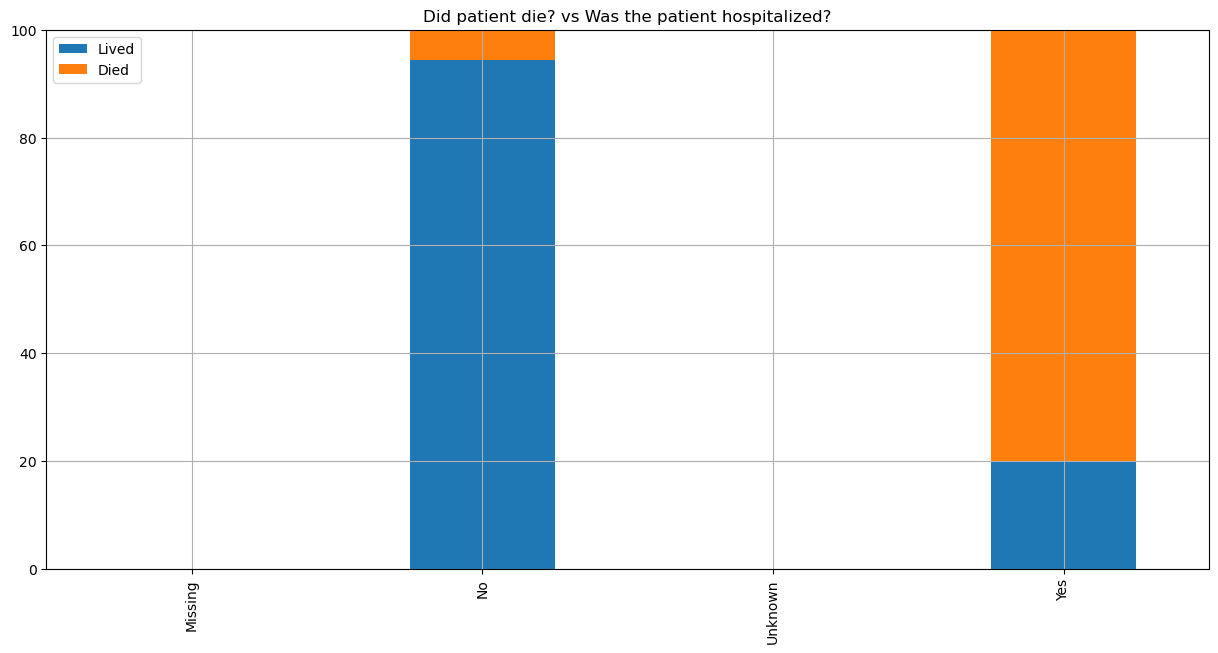

In [55]:
#Using code from the module lab
Hosp = pd.unique(df["hosp_yn"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("Hosp_yn")
print("Index \t Count")

# for each category
for i in Hosp[0:2]:
    
    count = df[df["hosp_yn"] == i].count()['death_yn']
    count_percentage = (1 / count) * 100
        
    # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['hosp_yn'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','hosp_yn','death_yn']].groupby(['hosp_yn','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Did patient die? vs Was the patient hospitalized?", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Lived", "Died"])

my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for hospitalisation against the death risk outcome. 
- The figures are as expected.
- There is a clear stark increase likelihood of death in cases as that required hospitalisation.
- This does not indicate that the hospitilisation caused the deaths rather that the cases that required acute medical attention more often resulted in death than those that did not.

month
Index 	 Count
2020-12 	 3848
2021-01 	 3198
2021-11 	 1533
2022-02 	 964
2021-08 	 1988
2020-05 	 731
2022-01 	 6410
2021-12 	 3348
2021-09 	 1806
2020-04 	 1581
2020-07 	 1222
2021-02 	 1232
2020-06 	 763
2020-10 	 1409
2020-11 	 3123
2020-03 	 651
2020-08 	 859
2022-11 	 699
2021-04 	 993
2021-10 	 1260
2023-01 	 627
2021-05 	 462
2021-06 	 256
2022-12 	 771
2022-06 	 1004
2020-09 	 792
2021-07 	 816
2022-07 	 1115
2022-08 	 1021
2022-04 	 593
2021-03 	 1093
2022-10 	 447
2022-05 	 1587
2020-01 	 9
2020-02 	 2
2022-09 	 624
2023-02 	 328
2023-03 	 439
2022-03 	 264
2023-04 	 130


(0.0, 100.0)

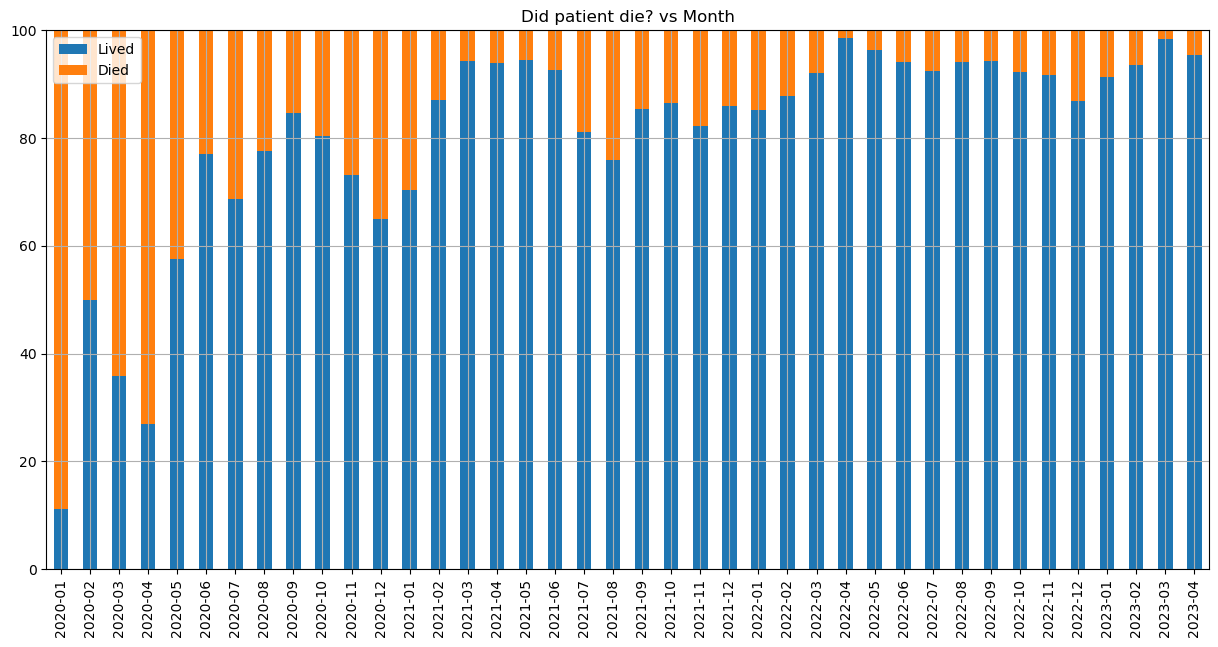

In [56]:
#Using code from the module lab
month = pd.unique(df["case_month"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("month")
print("Index \t Count")

# for each category
for i in month:
    
    count = df[df["case_month"] == i].count()['death_yn']
    if count > 1: #100 can be used to take out small sample sizes
        count_percentage = (1 / count) * 100
        
        # print out index vs count
        print(i, "\t", count)
    
        index_list = df[df['case_month'] == i].index.tolist()
        for ind in index_list:
            df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','case_month','death_yn']].groupby(['case_month','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Did patient die? vs Month", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Lived", "Died"])

my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Case Month against the death risk outcome. 
- There is trend of as time passed the likelihood of death outcomes reduced.
- I would propose a cap of at least 100 rows for each month to be included as the first two months provide extreme results due to small sample sizes. 
- This data along with vaccine rollout dates could provide an interesting feature.
- Judging from this we could derive a new feature determining if one, two or no vaccines were deployed and readily available. 

# (4). Transform, extend or combine the existing features to create a few new features (at least 3)

### Aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

#### **New feature 1** 
- VaccineNumAvailable : Measures how many vaccines had been released for use at said time
- Can see if vaccine rollout had an effect on deaths and hospitalisation

In [87]:
# Deployment Dates
#Pfizer - December 14, 2020 
#Moderna - December 21, 2020
#J&J - March 1, 2021
#Novavax - August 1, 2022

df['case_month'] = df['case_month'].astype('datetime64')

In [89]:
from datetime import date
import pandas as pd

VaccDates = [
    '2019-12-01',
    '2020-12-01',
    '2021-01-01',
    '2021-03-01',
    '2021-08-01',
    '2023-04-01'
]
VaccDates = pd.Series(VaccDates).astype('datetime64')

df['NumVaccinesAvail'] = pd.cut(df['case_month'], VaccDates, labels = [0, 1, 2, 3, 4])
df.sort_values('NumVaccinesAvail')

,case_month,age_group,sex,race,ethnicity,current_status,hosp_yn,death_yn,County/Code,State/Code,percent,NumVaccinesAvail
0,2020-12-01,65+ years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,Yes,LOS ANGELES / 6037.0,CA / 6.0,0,0
17337,2020-12-01,18 to 49 years,Female,White,Non-Hispanic/Latino,Probable Case,No,No,PAYNE / 40119.0,OK / 40.0,0,0
43051,2020-07-01,50 to 64 years,Female,Missing,Missing,Laboratory-confirmed case,Missing,No,DAKOTA / 27037.0,MN / 27.0,0,0
17333,2020-12-01,18 to 49 years,Female,Missing,Missing,Laboratory-confirmed case,Missing,No,WESTCHESTER / 36119.0,NY / 36.0,0,0
43053,2020-11-01,18 to 49 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,No,OCEANA / 26127.0,MI / 26.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
24203,2021-11-01,18 to 49 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,No,BROOME / 36007.0,NY / 36.0,0,4
24202,2022-01-01,0 - 17 years,Female,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Unknown,No,WAKE / 37183.0,NC / 37.0,0,4
24201,2022-02-01,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,No,GOODHUE / 27049.0,MN / 27.0,0,4
24228,2022-01-01,0 - 17 years,Male,Missing,Missing,Laboratory-confirmed case,Unknown,No,CATAWBA / 37035.0,NC / 37.0,0,4


NumVaccinesAvail
Index 	 Count
0 	 14990
1 	 3198
4 	 24970
3 	 4515
2 	 2325


(0.0, 100.0)

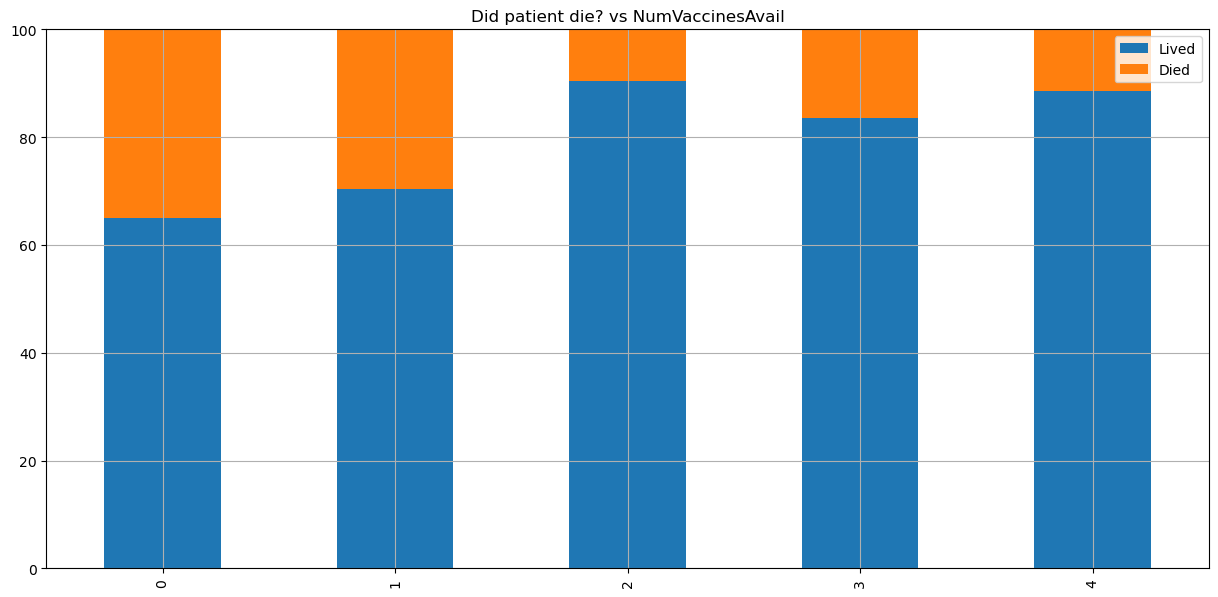

In [92]:
#Using code from the module lab
Vacc = pd.unique(df["NumVaccinesAvail"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("NumVaccinesAvail")
print("Index \t Count")

# for each category
for i in Vacc:
    
    count = df[df["NumVaccinesAvail"] == i].count()['death_yn'] #100 can be used to take out small sample sizes
    count_percentage = (1 / count) * 100
        
        # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['NumVaccinesAvail'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','NumVaccinesAvail','death_yn']].groupby(['NumVaccinesAvail','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Did patient die? vs NumVaccinesAvail", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Lived", "Died"])

my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.set_ylim([0,100])

We can see the stacked bar plot for Vaccines Available against the death risk outcome. 
- There is trend of as more vaccines becomes available the likelihood of death outcomes reduced.
- There is a small dip in lived percentage from 2 to 3 but increases once again at 4. 

#### **New feature 2** 
- DangerZone = Older Age, Male, Non-white
- Yes if meets criteria, no if not

'Factors associated with deaths due to COVID-19 versus other causes: population-based cohort analysis of UK primary care data and linked national death registrations within the OpenSAFELY platform'-Published:May 08, 2021

"Older age was more strongly associated with COVID-19 death, as was male sex, deprivation, obesity, and some comorbidities. All non-white ethnic groups had higher odds than white of COVID-19 death."

DangerZone = Older Age, Male, Non-white

In [124]:
df['DangerZone'] = 'No'
df.loc[(df['age_group'] == '65+ years') & (df['race'] != 'White') & (df['sex'] == 'Male'), 'DangerZone'] = 'Yes'

In [128]:
df.loc[(df['DangerZone'] == 'Yes')]

,case_month,age_group,sex,race,ethnicity,current_status,hosp_yn,death_yn,County/Code,State/Code,percent,NumVaccinesAvail,DangerZone
12,2021-01-01,65+ years,Male,Unknown,Unknown,Laboratory-confirmed case,Missing,Yes,HIDALGO / 48215.0,TX / 48.0,0.031270,1,Yes
19,2022-01-01,65+ years,Male,Asian,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Yes,SAN FRANCISCO / 6075.0,CA / 6.0,0.004005,4,Yes
21,2022-01-01,65+ years,Male,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Yes,PINELLAS / 12103.0,FL / 12.0,0.004005,4,Yes
39,2021-01-01,65+ years,Male,Unknown,Unknown,Laboratory-confirmed case,Missing,Yes,COMAL / 48091.0,TX / 48.0,0.031270,1,Yes
48,2020-04-01,65+ years,Male,Missing,Missing,Laboratory-confirmed case,Yes,Yes,COOK / 17031.0,IL / 17.0,0.006671,0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49702,2021-10-01,65+ years,Male,Unknown,Unknown,Probable Case,No,No,YELLOWSTONE / 30111.0,MT / 30.0,0.004005,4,Yes
49732,2021-02-01,65+ years,Male,Unknown,Unknown,Laboratory-confirmed case,No,No,MONTGOMERY / 48339.0,TX / 48.0,0.043011,2,Yes
49767,2021-12-01,65+ years,Male,Unknown,Unknown,Laboratory-confirmed case,Missing,No,MAHONING / 39099.0,OH / 39.0,0.004005,4,Yes
49775,2020-11-01,65+ years,Male,Black,Missing,Laboratory-confirmed case,Missing,No,MARION / 39101.0,OH / 39.0,0.006671,0,Yes


DangerZone
Index 	 Count
No 	 48303
Yes 	 1695


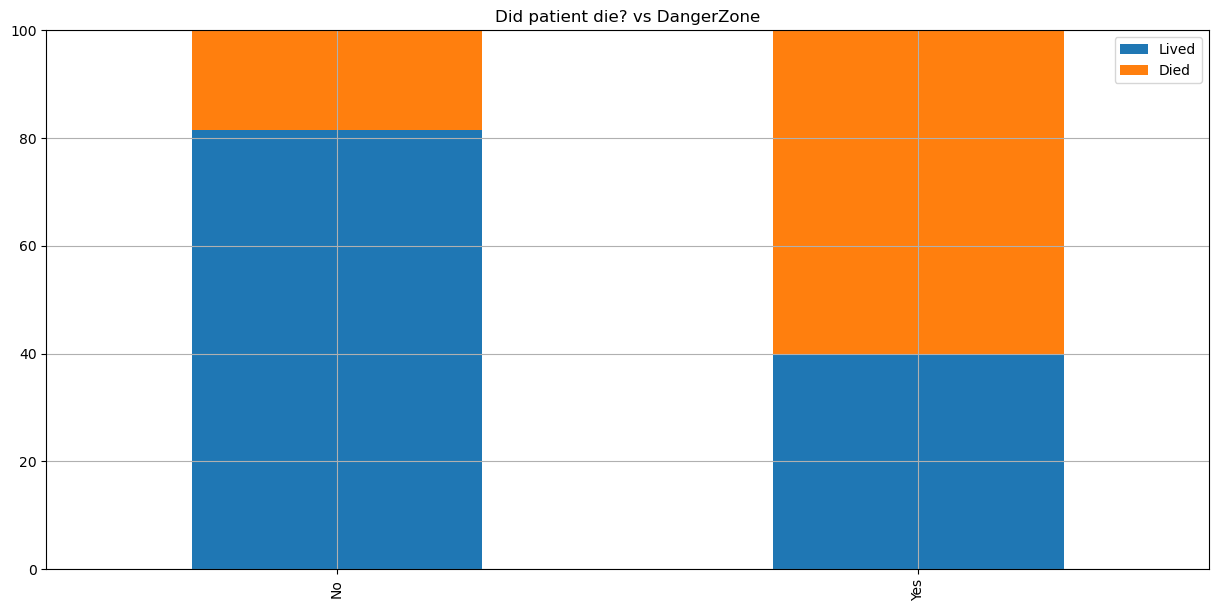

In [156]:
#Using code from the module lab
Danger = pd.unique(df["DangerZone"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("DangerZone")
print("Index \t Count")

# for each category
for i in Danger:
    
    count = df[df["DangerZone"] == i].count()['death_yn'] #100 can be used to take out small sample sizes
    count_percentage = (1 / count) * 100
        
        # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['DangerZone'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','DangerZone','death_yn']].groupby(['DangerZone','death_yn']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="Did patient die? vs DangerZone", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Lived", "Died"])

my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.set_ylim([0,100])
df['DangerZone'] = df['DangerZone'].astype('category')

We can see the stacked bar plot for DangerZone against the death risk outcome. 
- We can see that 60% of all in the DangerZone died. Compared to only 18% of the non-DangerZone dying.
- We can see that members of the DangerZone group were at a higher risk.  

#### **New feature 3** 
- TreatedinHosp = Patients were either Not Hospitalised, Treated in Hospital or Died in Hospital.
From this feature we can see which patients were more likely to be treated in hospital, die in hospital or not hospitalised at all.

In [140]:
df['TreatedinHosp'] = 'Not Hospitalised'
df.loc[(df['hosp_yn'] == 'Yes') & (df['death_yn'] == 'Yes'), 'TreatedinHosp'] = 'Died in Hospital'
df.loc[(df['hosp_yn'] == 'Yes') & (df['death_yn'] == 'No'), 'TreatedinHosp'] = 'Treated'

In [133]:
df.loc[(df['TreatedinHosp'] == 'Yes')]

,case_month,age_group,sex,race,ethnicity,current_status,hosp_yn,death_yn,County/Code,State/Code,percent,NumVaccinesAvail,DangerZone,TreatedinHosp
10049,2020-12-01,50 to 64 years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,No,Surpressed / Surpressed,KY / 21.0,0.00207,0,No,Yes
10075,2022-12-01,65+ years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,No,ISANTI / 27059.0,MN / 27.0,0.00207,4,No,Yes
10118,2021-06-01,50 to 64 years,Female,White,Unknown,Laboratory-confirmed case,Yes,No,DALLAS / 48113.0,TX / 48.0,0.00207,3,No,Yes
10125,2022-06-01,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,No,Surpressed / Surpressed,TX / 48.0,0.00207,4,No,Yes
10158,2021-10-01,18 to 49 years,Missing,Missing,Missing,Laboratory-confirmed case,Yes,No,MORRISON / 27097.0,MN / 27.0,0.00207,4,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49836,2021-04-01,18 to 49 years,Female,Missing,Missing,Laboratory-confirmed case,Yes,No,ATLANTIC / 34001.0,NJ / 34.0,0.00207,3,No,Yes
49839,2020-07-01,50 to 64 years,Female,Missing,Missing,Laboratory-confirmed case,Yes,No,LAPORTE / 18091.0,IN / 18.0,0.00207,0,No,Yes
49866,2021-04-01,50 to 64 years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,No,MARICOPA / 4013.0,AZ / 4.0,0.00207,3,No,Yes
49936,2022-06-01,18 to 49 years,Male,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,No,HENNEPIN / 27053.0,MN / 27.0,0.00207,4,No,Yes


TreatedinHosp
Index 	 Count
Not Hospitalised 	 42767
Died in Hospital 	 5796
Treated 	 1435


(0.0, 100.0)

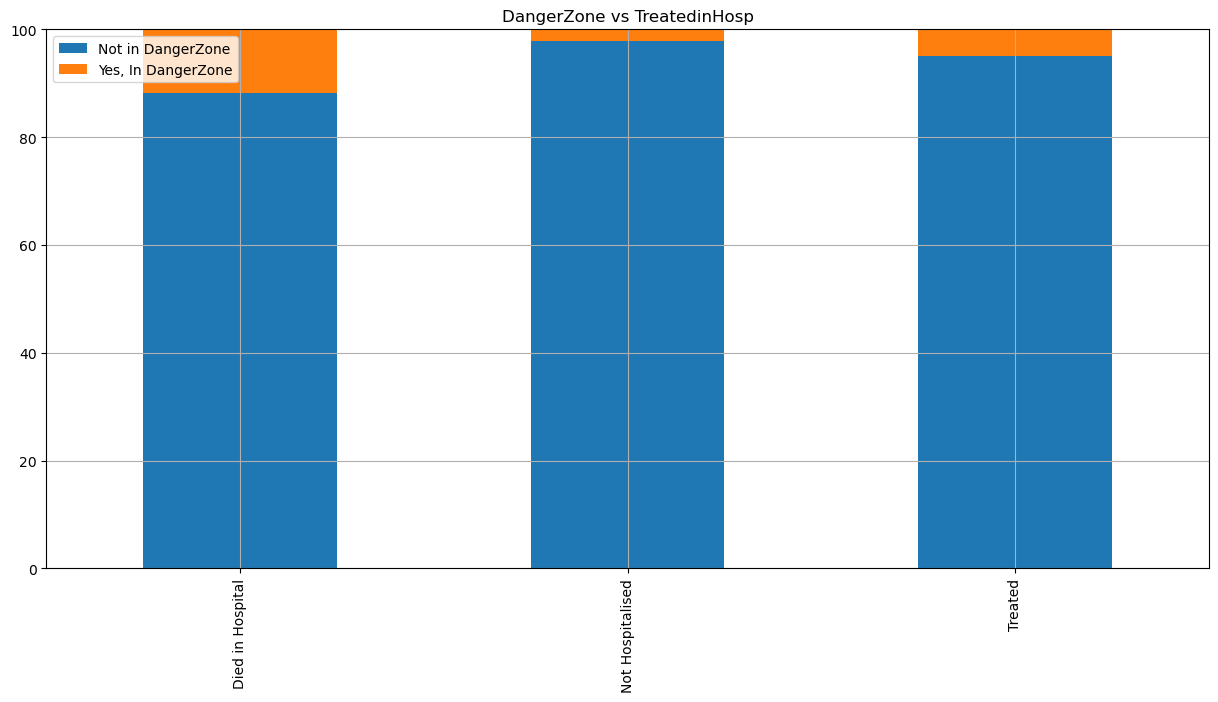

In [152]:
#Using code from the module lab
Treat = pd.unique(df["TreatedinHosp"].ravel())

# add new column and set values to zero
df['percent'] = 0

#print header
print("TreatedinHosp")
print("Index \t Count")

# for each category
for i in Treat:
    
    count = df[df["TreatedinHosp"] == i].count()['DangerZone'] #100 can be used to take out small sample sizes
    count_percentage = (1 / count) * 100
        
        # print out index vs count
    print(i, "\t", count)
    
    index_list = df[df['TreatedinHosp'] == i].index.tolist()
    for ind in index_list:
        df.loc[ind, 'percent'] = count_percentage
        
group = df[['percent','TreatedinHosp','DangerZone']].groupby(['TreatedinHosp','DangerZone']).sum()

my_plot = group.unstack().plot(kind='bar', stacked=True, title="DangerZone vs TreatedinHosp", figsize=(15,7), grid=True)

# add legend
#red_patch = mpatches.Patch(color='orange', label='Good')
#blue_patch = mpatches.Patch(color='blue', label='Bad')
#my_plot.legend(handles=[red_patch, blue_patch], frameon = True)
my_plot.legend(["Not in DangerZone", "Yes, In DangerZone"])

my_plot.set_xlabel("")
my_plot.set_ylabel("")
my_plot.set_ylim([0,100])

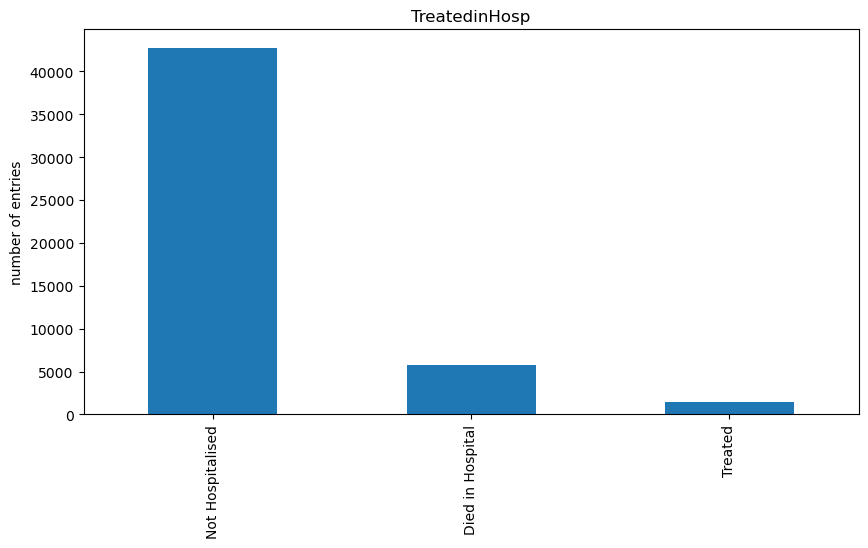

In [154]:
f = df['TreatedinHosp'].value_counts().plot(kind='bar', figsize=(10,5))
plt.title('TreatedinHosp')
plt.ylabel('number of entries')
plt.show()
df['TreatedinHosp'] = df['TreatedinHosp'].astype('category')

 We can see the plots for TreatedinHosp feature. 
- There is result that shows that more people died in hospital that were cured in hospital. 
- We also see that there is a higher proportion of people in the DangerZone that died in hospital than people that werent hospitalised or treated in hospital. 

### To finish - Print data types, descriptive tables, save to csv

In [157]:
df.dtypes

case_month          datetime64[ns]
age_group                 category
sex                       category
race                      category
ethnicity                 category
current_status            category
hosp_yn                   category
death_yn                  category
County/Code               category
State/Code                category
percent                    float64
NumVaccinesAvail          category
DangerZone                category
TreatedinHosp             category
dtype: object

In [158]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
age_group,49998,5,18 to 49 years,20216
sex,49998,4,Female,25680
race,49998,8,White,30412
ethnicity,49998,4,Non-Hispanic/Latino,29620
current_status,49998,2,Laboratory-confirmed case,42228
hosp_yn,49998,4,No,25188
death_yn,49998,2,No,39998
County/Code,49998,1366,Surpressed / Surpressed,2831
State/Code,49998,50,NY / 36.0,5670
NumVaccinesAvail,49998,5,4,24970


In [159]:
# Write the cleaned dataframe to a csv file
df.to_csv('CDC_COVID_1-3_cleaned_new_features.csv', index=False)